In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Other:
from scipy import stats

# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
#pd.set_option('display.max_columns', 10)

# Eerst kijken welke geslachten er zijn
display(df_co2['geslacht'].value_counts())

# Er zijn 2 "anders" geslacht dus we droppen deze values
df_co2 = df_co2[df_co2['geslacht'].isin(['man', 'vrouw'])]
display(df_co2['geslacht'].value_counts())

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

geslacht
vrouw     778
man       720
anders      2
Name: count, dtype: int64

geslacht
vrouw    778
man      720
Name: count, dtype: int64

# Deel A: Data exploratie en voorbereiding

### 1.	Geef voor elke variabele in de dataset weer tot welk meetniveau deze behoort.

| Variabele | Meetniveau |
| --- | --- |
| persoon_ID | Geen |
| geslacht | Nominaal |
| leeftijd | Ratio |
| gewicht_KG | Ratio |
| burgerlijke_staat | Nominaal |
| jaarsalaris_eu | Ratio |
| huishouden_grootte | Ratio |
| stad | Nominaal |
| provincie | Nominaal |
| opleiding_niveau | Ordinaal |
| autobezit | Nominaal |
| fietsbezit | Nominaal |
| elektrisch_auto | Nominaal |
| km_auto_per_jaar | Ratio |
| km_fiets_per_jaar | Ratio |
| km_ov_per_jaar | Ratio |
| km_vliegtuig_per_jaar | Ratio |
| dagen_thuiswerken_per_week_pro_rato | Ratio |
| dagen_kantoorwerken_per_week_pro_rato | Ratio |
| dagen_in_buitenland_per_jaar | Ratio |
| gebruik_carsharing | Ordinaal |
| co2_uitstoot_per_jaar_KG | Ratio |

In [2]:
# 1
# Gemaakt in markdown. Wellicht dat we al eerder het ID droppen? Deze gaan we toch niet gebruiken
# Mischien ook verstandig om hier ook toelichting bij te geven als dit nodig is?

### 2.	Waarom is het nodig om vooraf te bekijken tot welk meetniveau elke variabele behoort?

Dit helpt ons om te bepalen welke statistische methode we gaan gebruiken en om te bepalen hoe we de data gaan voorbewerken.<br>
(Mischien nog wat dieper op in gaan)

### 3.	Ga na of er missende/niet kloppende/extreme waarden zijn in de dataset en ga hier op een adequate manier mee om.

Data kwaliteit rapport van:      geslacht  leeftijd  gewicht_KG burgerlijke_staat  jaarsalaris_eu  \
0         man        50       52.66  weduwe/weduwnaar        48003.64   
1       vrouw        65       64.58       samenwonend        55208.63   
2         man        49       90.87       samenwonend        29533.78   
3         man        34       80.43            gehuwd        44453.27   
4         man        60       72.28          ongehuwd        56497.64   
...       ...       ...         ...               ...             ...   
1495      man        78       85.84  weduwe/weduwnaar        28295.50   
1496      man        54       85.09          ongehuwd        45963.45   
1497      man        48       71.79  weduwe/weduwnaar        43443.92   
1498      man        76       69.02            gehuwd        33158.29   
1499      man        61       40.47  weduwe/weduwnaar        30786.00   

      huishouden_grootte        stad      provincie opleiding_niveau  \
0                      

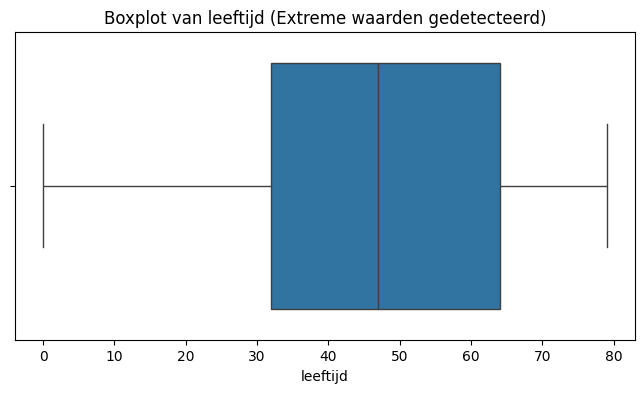

 - gewicht_KG: 1488 extreme waarden


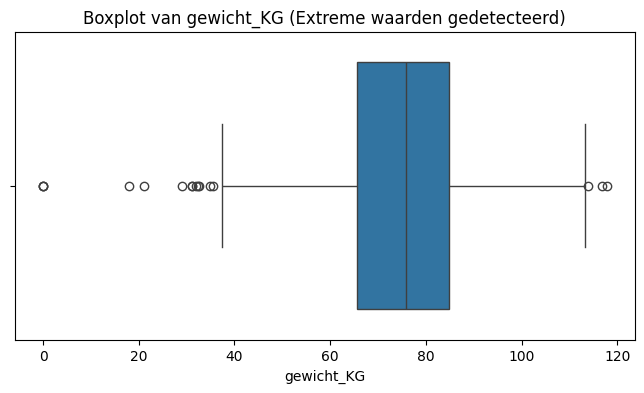

 - jaarsalaris_eu: 1490 extreme waarden


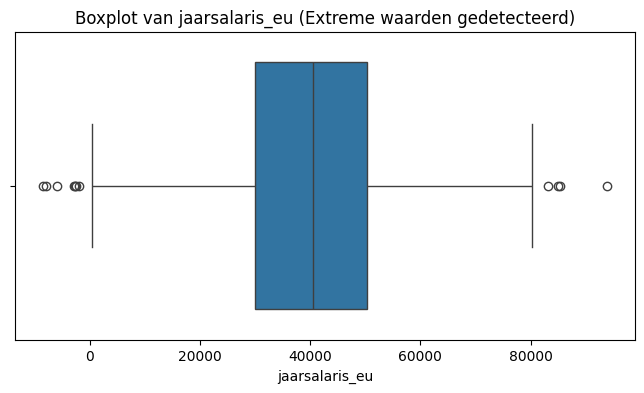

 - huishouden_grootte: 1498 extreme waarden


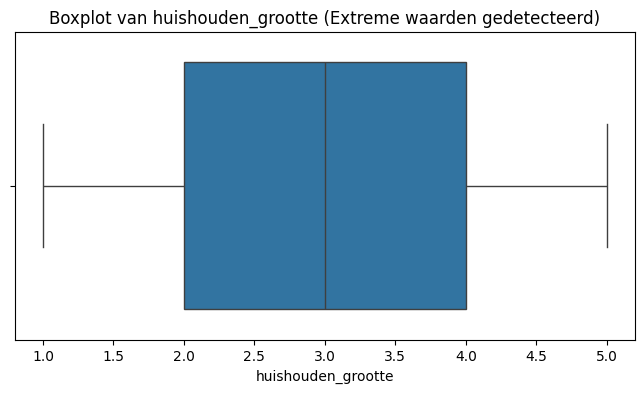

 - km_auto_per_jaar: 1498 extreme waarden


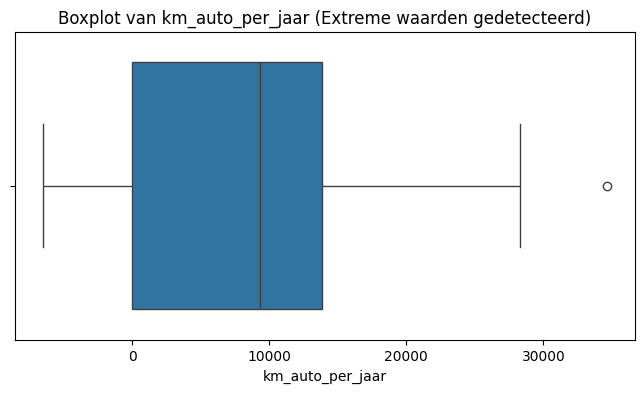

 - km_fiets_per_jaar: 1353 extreme waarden


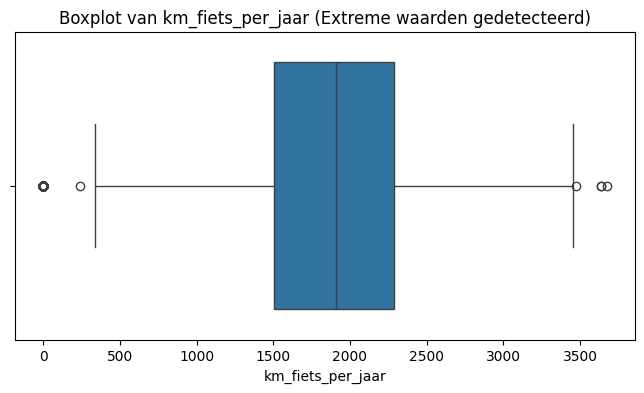

 - km_ov_per_jaar: 1492 extreme waarden


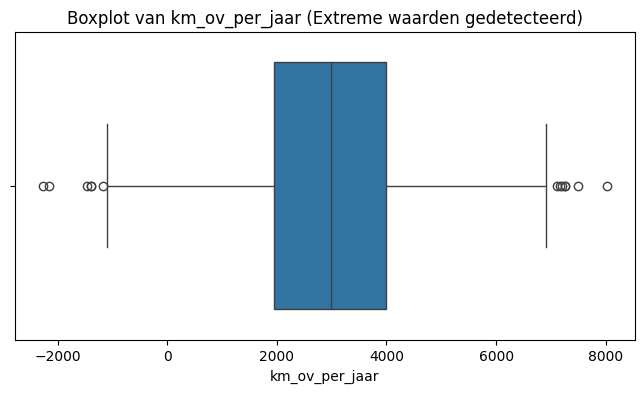

 - km_vliegtuig_per_jaar: 1498 extreme waarden


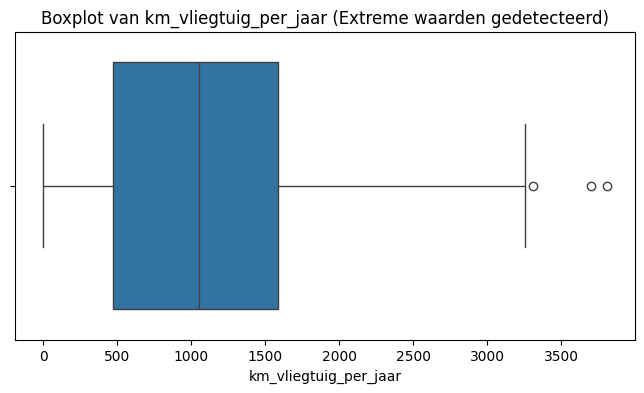

 - dagen_thuiswerken_per_week_pro_rato: 1498 extreme waarden


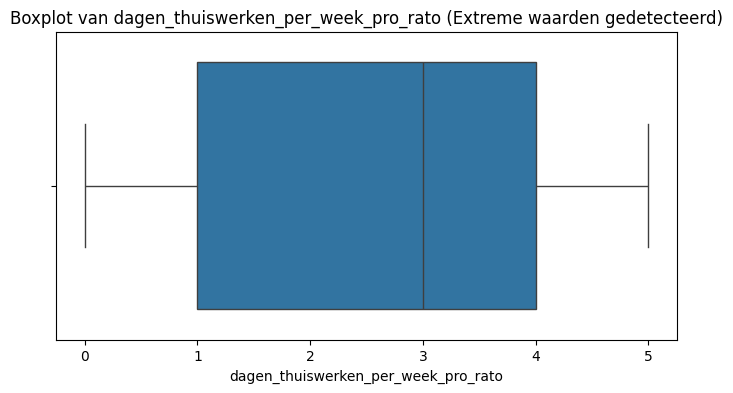

 - dagen_kantoorwerken_per_week_pro_rato: 1498 extreme waarden


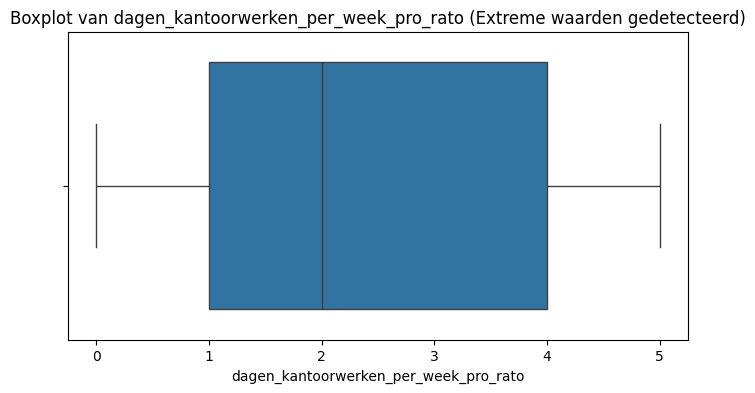

 - dagen_in_buitenland_per_jaar: 1498 extreme waarden


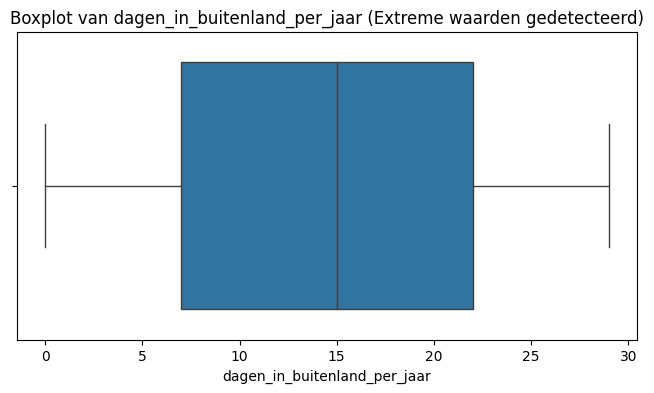

 - co2_uitstoot_per_jaar_KG: 1491 extreme waarden


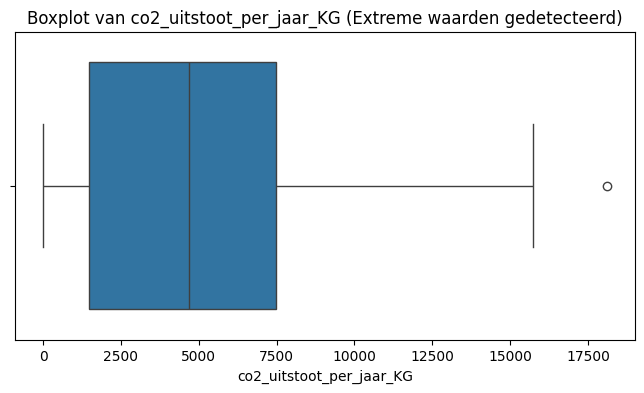

/tmp/ipykernel_357/3101121033.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missend.values, y=missend.index, palette="Blues_d")


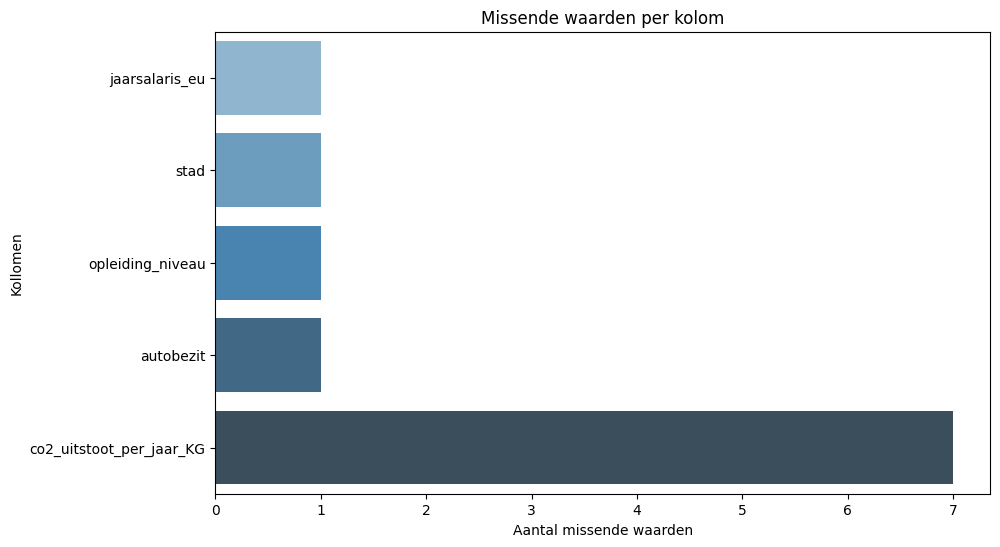

/tmp/ipykernel_357/3101121033.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")


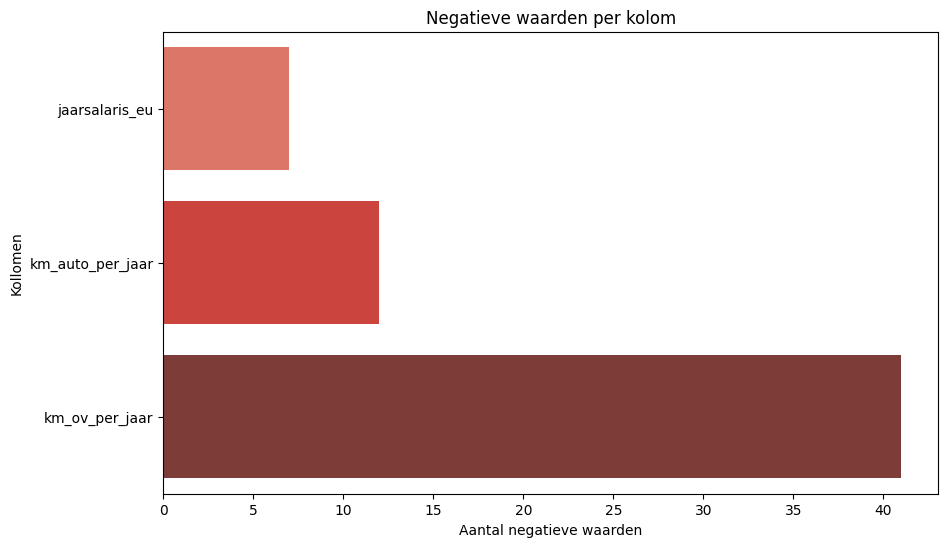

In [3]:
# 3

# Verwijder ID kolom
if 'persoon_ID' in df_co2.columns:
    df_co2 = df_co2.drop('persoon_ID', axis=1)

def data_kwaliteit_check(df):
    """
    Data kwaliteit rapport, toont missende waarden, negatieve waarde en extreme waarde
    """
    print(f"Data kwaliteit rapport van: {df}\n")

    # Totaal missende waarden:
    totaal_missend = df.isnull().sum().sum()
    print(f"Totaal aantal missende waarden: {totaal_missend}\n")

    # Missende waarden per kolom:
    missend_kolom = df.isnull().sum()
    print("Missende waarden per kolom:")
    print(missend_kolom[missend_kolom > 0])
    print()

    # Totaal aantal negatieve waarden:
    df_numeriek = df.select_dtypes(include=[np.number])
    totaal_negatief = (df_numeriek < 0).sum().sum()
    print(f"Totaal aantal negatiefe waarden in numerieke kollomen: {totaal_negatief}\n")

    # Negatieve waarden per kolom:
    negatief_per_kolom = (df_numeriek < 0).sum()
    print("Negatieve waarden per kolom:")
    print(negatief_per_kolom[negatief_per_kolom > 0])
    print()

    # Extreme waarden met hulp van IQR
    print("Extreme waarden gedetecteerd:")
    for col in df_numeriek.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        laag = Q1 - 2.5 * IQR
        hoog = Q3 - 2.5 * IQR

        extreem_aantal = ((df[col] < laag) | (df[col] > hoog)).sum()
        if extreem_aantal > 0:
            print(f" - {col}: {extreem_aantal} extreme waarden")
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot van {col} (Extreme waarden gedetecteerd)")
            plt.show()
    print()

    # Missende waarden per kolom plot
    missend = missend_kolom[missend_kolom > 0]
    if not missend.empty:
        plt.figure(figsize=(10,6))
        sns.barplot(x=missend.values, y=missend.index, palette="Blues_d")
        plt.xlabel("Aantal missende waarden")
        plt.ylabel("Kollomen")
        plt.title("Missende waarden per kolom")
        plt.show()
    else:
        print("Geen missende waarden om te visualizeren")
    
    # Negatieve waarden per kolom plot
    negatief = negatief_per_kolom[negatief_per_kolom > 0]
    if not negatief.empty:
        plt.figure(figsize=(10,6))
        sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")
        plt.xlabel("Aantal negatieve waarden")
        plt.ylabel("Kollomen")
        plt.title("Negatieve waarden per kolom")
        plt.show()
    else:
        print("Geen negatieve waarden om te visualizeren")

data_kwaliteit_check(df_co2)

We zien hier nu dat er 7 missende waarden zijn in de co2 kolom. Dat is nouw net de belangrijkste kolom voor ons. Verder missen er van 4 andere kollomen ook 1 waarden, ik ga er vanuit dat dit dezelfde rij is en verwijder deze.

We verwijderen deze en doen de check nogmaals

Data kwaliteit rapport van:      geslacht  leeftijd  gewicht_KG burgerlijke_staat  jaarsalaris_eu  \
0         man        50       52.66  weduwe/weduwnaar        48003.64   
1       vrouw        65       64.58       samenwonend        55208.63   
2         man        49       90.87       samenwonend        29533.78   
3         man        34       80.43            gehuwd        44453.27   
4         man        60       72.28          ongehuwd        56497.64   
...       ...       ...         ...               ...             ...   
1495      man        78       85.84  weduwe/weduwnaar        28295.50   
1496      man        54       85.09          ongehuwd        45963.45   
1497      man        48       71.79  weduwe/weduwnaar        43443.92   
1498      man        76       69.02            gehuwd        33158.29   
1499      man        61       40.47  weduwe/weduwnaar        30786.00   

      huishouden_grootte        stad      provincie opleiding_niveau  \
0                      

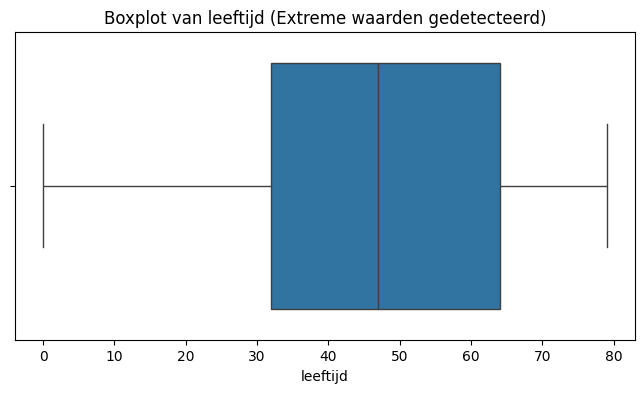

 - gewicht_KG: 1477 extreme waarden


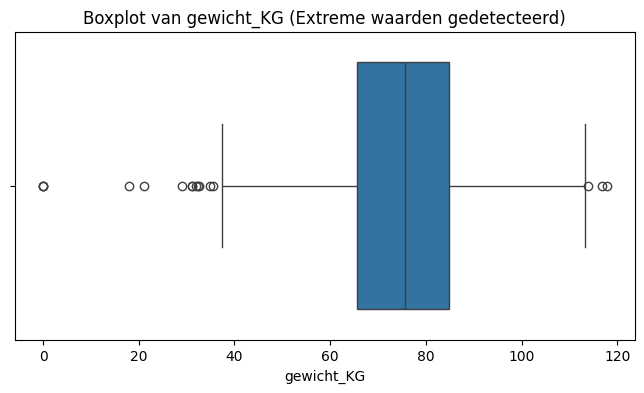

 - jaarsalaris_eu: 1487 extreme waarden


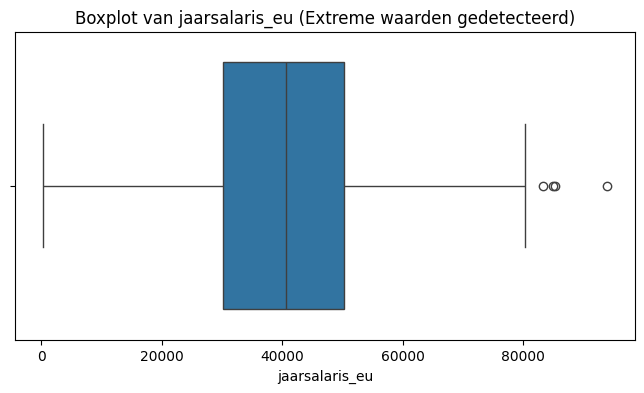

 - huishouden_grootte: 1487 extreme waarden


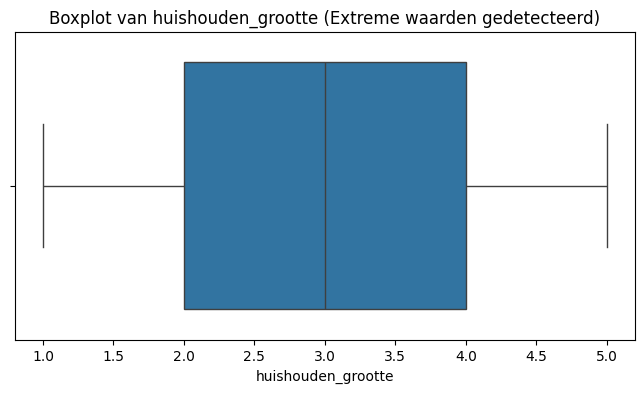

 - km_auto_per_jaar: 1487 extreme waarden


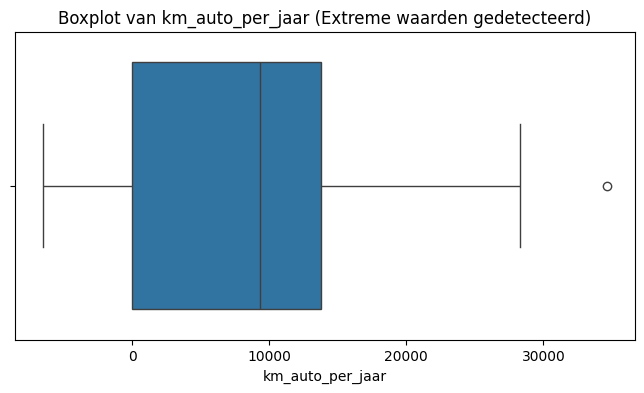

 - km_fiets_per_jaar: 1343 extreme waarden


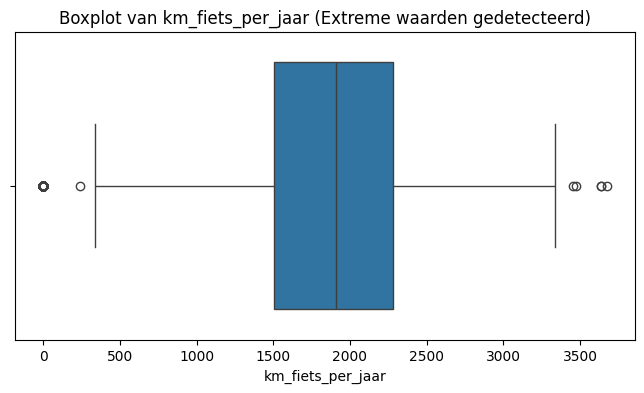

 - km_ov_per_jaar: 1480 extreme waarden


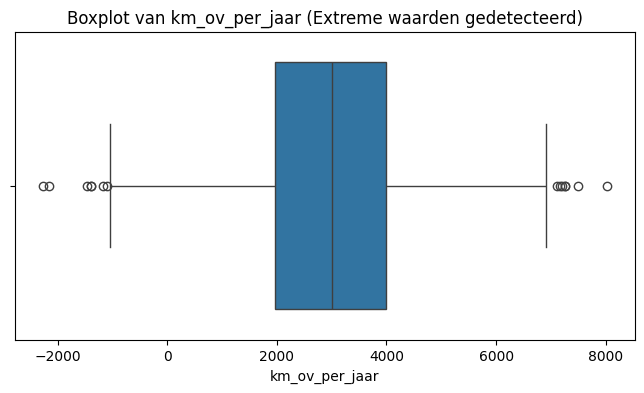

 - km_vliegtuig_per_jaar: 1487 extreme waarden


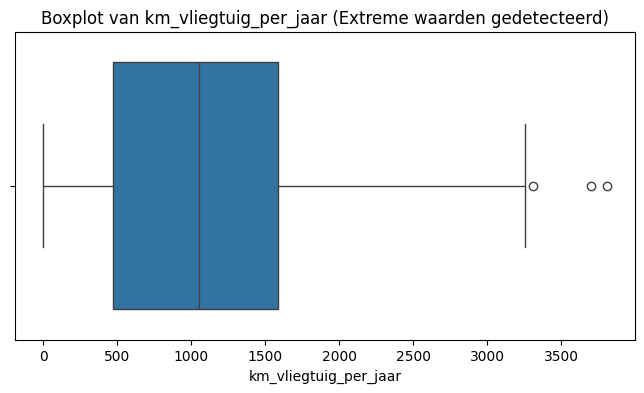

 - dagen_thuiswerken_per_week_pro_rato: 1487 extreme waarden


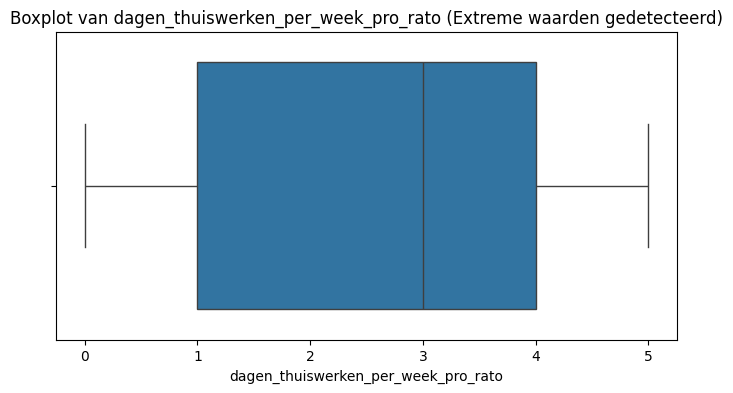

 - dagen_kantoorwerken_per_week_pro_rato: 1487 extreme waarden


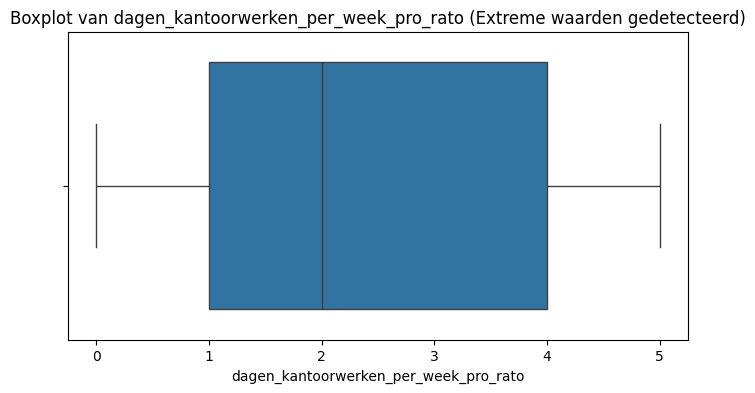

 - dagen_in_buitenland_per_jaar: 1487 extreme waarden


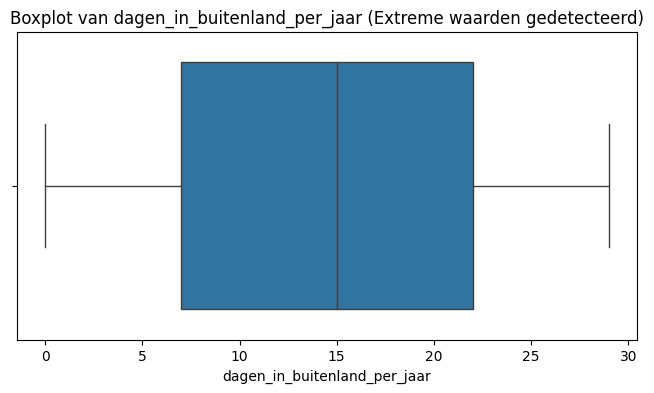

 - co2_uitstoot_per_jaar_KG: 1487 extreme waarden


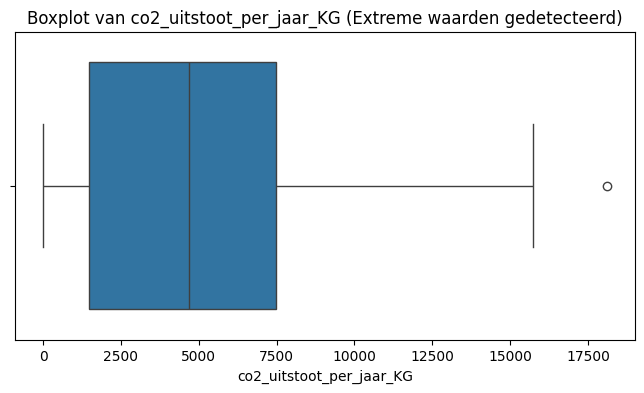


Geen missende waarden om te visualizeren


/tmp/ipykernel_357/3101121033.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")


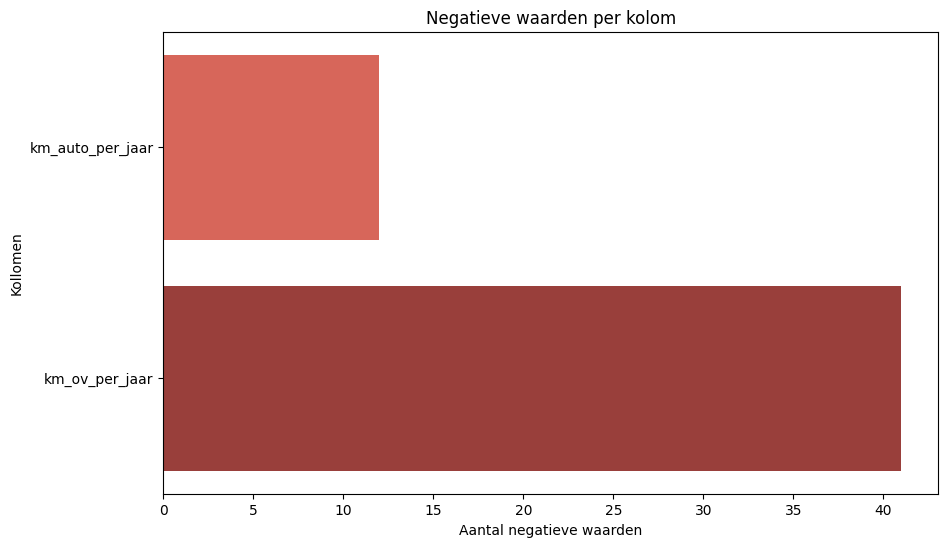

In [4]:
df_co2 = df_co2.dropna(subset=['co2_uitstoot_per_jaar_KG', 'autobezit', 'jaarsalaris_eu', 'stad', 'opleiding_niveau'])
data_kwaliteit_check(df_co2)

We gaan verder niks doen met de uitschieters (voorlopig) aangezien dit nog niks ernstigs doet. Wel gaan we ervoor zorgen dat er geen negatieve getallen staan waar dit niet kan.

Je kan bijvoorbeeld niet -200 km per jaar hebben gereden.

We veranderen alle negatieve waarden naar NaN zodat we later kunnen beslissen wat we er mee doen. Het zal zeker kunnen dat dit 0 hoort te zijn, of misschien hoort de - er hellemaal niet.

In [5]:
# Kollomen definieren
foute_kollomen = ['km_auto_per_jaar', 'km_ov_per_jaar']
for col in foute_kollomen:
    df_co2.loc[df_co2[col] < 0, col] = np.nan

### 4.	Kies 2 onafhankelijke variabelen waarvan je denkt dat het invloed kan hebben op de jaarlijkse CO2 uitstoot. Visualiseer de verdeling van deze twee variabelen en de verdeling van de afhankelijke variabele.

Ik ga hiervoor eerst kijken wat de correlaties zijn tussen de data met een heatmap

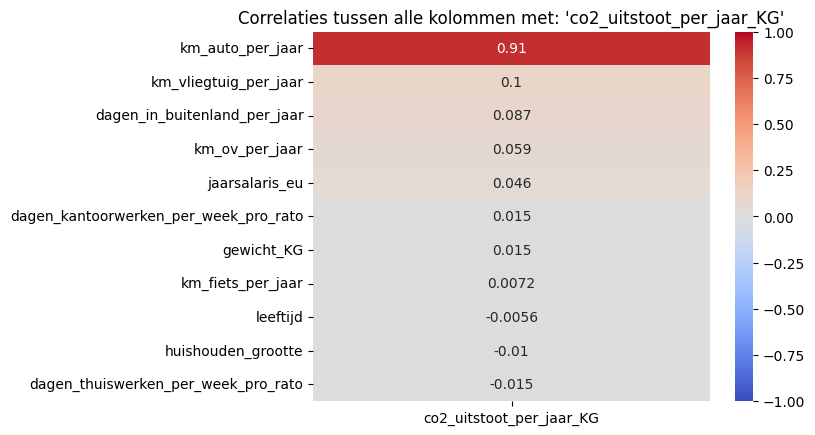

In [6]:
# 4
# Heatmap configuratie
df_co2_numeriek = df_co2.select_dtypes(include=[np.number])
co2_kolom = "co2_uitstoot_per_jaar_KG"
correlaties = df_co2_numeriek.corr()[[co2_kolom]].drop(co2_kolom)
correlaties = correlaties.sort_values(by=co2_kolom, ascending=False)

# Heatmap
sns.heatmap(correlaties, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlaties tussen alle kolommen met: '{co2_kolom}'")
plt.show()

We halen hieruit dat de 2 onafhankelijke variabelen die het meeste invloed hebben km auto per jaar en km vliegtuig per jaar zijn.

Deze visualiseren wij hieronder in een histplot samen met de co2 uitstoot

Verder visualiseren wij ook de verdeling van co2 tenopzichte van km vliegtuig en km auto

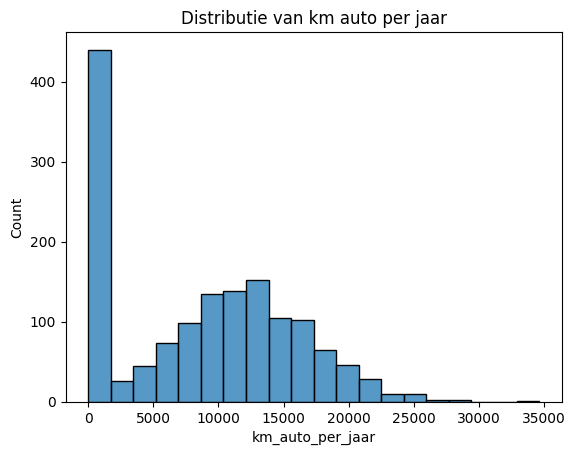

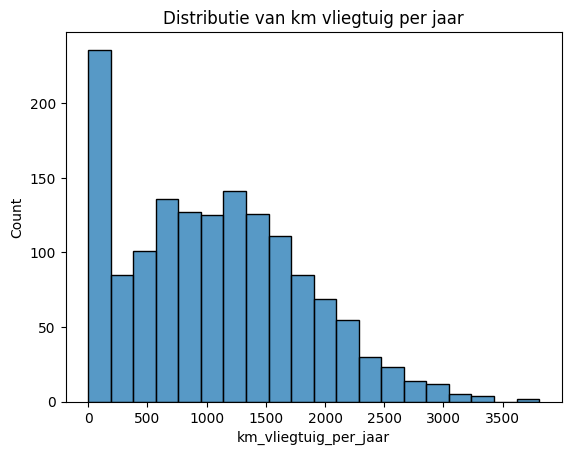

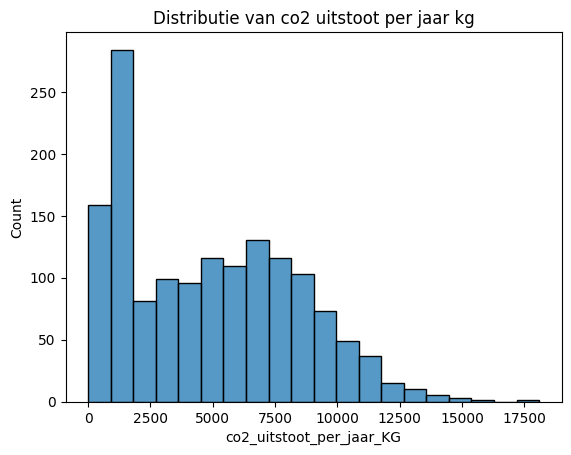

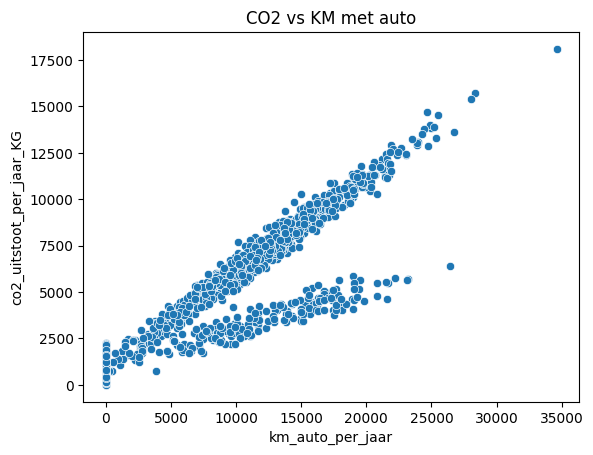

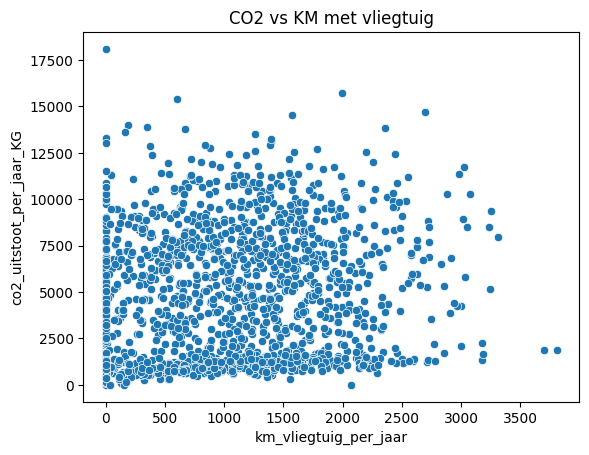

In [7]:
sns.histplot(df_co2_numeriek['km_auto_per_jaar'], kde=False, bins=20)
plt.title('Distributie van km auto per jaar')
plt.show()

sns.histplot(df_co2_numeriek['km_vliegtuig_per_jaar'], kde=False, bins=20)
plt.title('Distributie van km vliegtuig per jaar')
plt.show()

sns.histplot(df_co2_numeriek['co2_uitstoot_per_jaar_KG'], kde=False, bins=20)
plt.title('Distributie van co2 uitstoot per jaar kg')
plt.show()

sns.scatterplot(x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', data=df_co2_numeriek)
plt.title('CO2 vs KM met auto')
plt.show()

sns.scatterplot(x='km_vliegtuig_per_jaar', y='co2_uitstoot_per_jaar_KG', data=df_co2_numeriek)
plt.title('CO2 vs KM met vliegtuig')
plt.show()

Wat mij het meeste opvalt is dat het heel erg duidelijk is dat km met de auto heel veel invloed heeft op de CO2 uitstoot, terwijl km vliegtuig vrijwel niks heeft.

Zo zien we ook dat de meest uitstotende persoon 0 km heeft gevlogen maar ook de meeste km met de auto heeft (ongeveer 35000)

### 5.	Geef een beschrijving van de 3 visualisaties met behulp van statistische termen.

Het is vrij duidelijk dat alle kollomen ook 0 waarden hebben, het is te zien dat bij km auto de meeste 0 is (rond de 3-400), vliegtuig heeft het ook erg ruig, zoals je op de scatterplot kan zien staan er veel punten bij de 0 maar deze kunnen wel een hoog co2 uitstoot hebben.

Om een duidelijke beschrijving van de visualisaties te geven haal ik eerst even wat basis informatie op.

In [8]:
# 5
# definieer variabelen om gemakkelijk de kollomen terug te halen
car_kpy = df_co2_numeriek['km_auto_per_jaar']
plane_kpy = df_co2_numeriek['km_vliegtuig_per_jaar']
co2_py = df_co2_numeriek['co2_uitstoot_per_jaar_KG']
# functie met informatie per kollom
def show_statistics(var):
    print(f"--- {var.name} ---")
    stats = var.describe()
    for stat, value in stats.items():
        print(f"{stat.capitalize():<12}: {value:.2f}")
    print(f"Median      : {var.median()}")
    print(f"Skewness    : {var.skew():.2f}")
    print(f"Kurtosis    : {var.kurt():.2f}")
    print(f"Null        : {var.isnull().sum()}")
    print("")
show_statistics(car_kpy)
show_statistics(plane_kpy)
show_statistics(co2_py)

--- km_auto_per_jaar ---
Count       : 1475.00
Mean        : 8666.76
Std         : 6974.58
Min         : 0.00
25%         : 0.00
50%         : 9407.52
75%         : 13847.78
Max         : 34618.87
Median      : 9407.52
Skewness    : 0.16
Kurtosis    : -0.96
Null        : 12

--- km_vliegtuig_per_jaar ---
Count       : 1487.00
Mean        : 1074.17
Std         : 749.59
Min         : 0.00
25%         : 471.49
50%         : 1055.27
75%         : 1589.76
Max         : 3808.20
Median      : 1055.27
Skewness    : 0.41
Kurtosis    : -0.34
Null        : 0

--- co2_uitstoot_per_jaar_KG ---
Count       : 1487.00
Mean        : 4913.62
Std         : 3422.60
Min         : 0.00
25%         : 1469.84
50%         : 4677.65
75%         : 7476.99
Max         : 18098.44
Median      : 4677.65
Skewness    : 0.44
Kurtosis    : -0.71
Null        : 0



#### **KM auto per jaar**

Voor deze kolom zijn er 12 missende waarden, dit kwam omdat deze hiervoor negatieve getallen waren en we deze nu naar NaN hebben gezet. Aangezien dit er maar 12 zijn van de 1477 is dit niet al te erg.<br>
We kunnen ook zien dat rond de 25% van de mensen niet rijdt, dit is best veel maar voor een land als Nederland vrij makkelijk te begrijpen.<br>
De max verschilt veel van de 75%, wat dus betekent dat er en uitschieter is, dat weten wij ook en deze heeft ook de hoogste co2 uitstoot.<br>
De distributie is vrij wijdt verdeeldt met een standard deviatie van 6973 en een gemiddeld van 8674.<br>
De mediaan van 9417 is lichtelijk boven het gemiddelde, wat in lijn is met de laage positieve skewness van 0.16<br>
Een kurtosis van -0.96 suggereert een platykurtische verdeling, platter dan normaal met weinig extreme waarden.

#### **KM vliegtuig per jaar**

Bij deze kolom zijn er geen missende waarden, ook laat de min weer zien dat er zeker een aantal mensen zijn die niet vliegen. Maar wel minder dan bij autos want bij 25% is er al 471 KM.<br>
Dit is natuurlijk niet veel (ongeveer van schiphol > dusseldorf en terug) maar is meer dan 0.<br>
Verder zien we ook dat er weer een aardig verschil tussen de 75% en de max zit (vrijwel het dubbele) verder moet ik ook zeggen dat zelfs de max niet realistisch is want alleen al naar Thailand is rond de 18000 km (heen en terug).<br>
De skewness wordt hier wel al wat positiever, maar is nogsteeds vrij laag.<br>
Met een kurtosis van -0.35 suggereert het ook weer een hele lichte platykurtische verdeling, maar het is nu wel heel laag.<br>

#### **CO2 uitstoot per jaar**

Er zijn geen missende waarden, maar er zijn wel een aantal waarden op 0, dit suggereert dat er sommige mensen CO2 neutraal zijn. Terwijl dit technisch gezien mogelijk is is het niet erg realistisch.<br>
Met hier ook weer de max meer dan het dubbele van de 75% suggereert dit dat er wat extreme waarden zijn, dit kunnen we ook aan de histplot zien.<br>
Met een skewness van 0.44 suggereert het weer een rechts scheve verdeling, maar dit is moeilijk te bepalen.<br>
Een kurtosis van -0.71 is weer een stuke hoger dan die van vliegtuigen maar is ook weer te laag om er iets definitiefs aan te hangen, het suggereert wel weer een platykurtische verdeling.

### 6.	Toets, met behulp van statistiek, of de verdelingen (vraag 4) normaal verdeeld zijn.

Hieronder hebben we een simpele functie gedefinieerd om de shapiro test uit te voeren op de variabelen. Zo kunnen we zien dat geen een van de variabelen normaal is verdeeld.

In [9]:
# 6
def normaal_verdeeld(var):
    stat, p = stats.shapiro(var.dropna())
    print(f"--- {var.name} ---")
    print(f"Normaal Verdeeld: {p > 0.05} ({p:.3g})")
    print("")

normaal_verdeeld(car_kpy)
normaal_verdeeld(plane_kpy)
normaal_verdeeld(co2_py)

--- km_auto_per_jaar ---
Normaal Verdeeld: False (4.25e-28)

--- km_vliegtuig_per_jaar ---
Normaal Verdeeld: False (2.33e-18)

--- co2_uitstoot_per_jaar_KG ---
Normaal Verdeeld: False (3.19e-24)



### 7.	Om ervoor te zorgen dat de onafhankelijke variabelen gebruikt kunnen worden voor Machine Learning moeten ze getransformeerd worden. Geef per meetniveau aan wat er moet gebeuren en waarom.

#### **Nominaal**

> Categorische data zonder volgorde (bijv. Stad, Gender, Merk)

**Actie:** Omzetten naar dummyvariabelen met `pd.get_dummies()`<br>
**Waarom:** Zo voorkomen we dat het model denkt dat er een logische volgorde of afstand is tussen de categorieën.

#### **Ordinaal**

> Categorische data met een betekenis maar onbekende afstand (bijv. Opleidings niveau)

**Actie:** Handmatig mappen naar numerieke waarden (bijv. `{'laag': 1, 'gemiddeld': 2, 'hoog': 3}`)<br>
**Waarom:** Zo behouden we de volgorde en kan het model begrijpen dat "hoog" meer betekent dan "laag".

#### **Interval**

> Numerieke data met gelijke afstanden, maar geen absoluut nulpunt (bijv. temperatuur in Celsius).

**Actie:** Standaardiseren met Z-score: `(x - mean) / std`<br>
**Waarom:** Machine Learning algoritmen presteren beter als de features vergelijkbare schalen hebben

#### **Ratio**

> Numerieke data met een absoluut nulpunt (bijv. gewicht, inkomen, afstand)

**Actie:** Standaardiseren of normaliseren<br>
**Waarom:** Hoewel deze variabelen een absoluut nulpunt hebben, kunnen schaalverschillen tussen ratio-variabelen alsnog ML-modellen beïnvloeden, dus ook hier blijft schalen belangrijk.


### 8.	Voer de transformatie uit. Let op dat je de getransformeerde variabelen in een nieuw dataframe opslaat, zodat je de oorspronkelijke waarden behoudt. De getransformeerde variabelen gebruik je alleen bij deel D. Zorg dat je inzicht krijgt in de relatie tussen de variabelen. Wat zijn je bevindingen?

Ik heb copies gemaakt van dataframes om de organelle niet te veranderen. Daarna heb ik aanpassingen gemaakt op basis van opdracht 1 voor de kolommen. 

In [10]:
# 8
from sklearn.preprocessing import StandardScaler

def transform_dataset(df, meetniveau_dict, ordinaal_mapping={}, gespiegelde_paren=[]):
    df_transform = pd.DataFrame(index=df.index)
    scaler = StandardScaler()

    for col, meetniveau in meetniveau_dict.items():
        if col not in df.columns:
            continue # Missende kollomen skippen

        if meetniveau == 'nominaal':
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df_transform = pd.concat([df_transform, dummies], axis=1)

        elif meetniveau == 'ordinaal':
            if col in ordinaal_mapping:
                df_transform[col] = df[col].map(ordinaal_mapping[col])
            else:
                raise ValueError(f"Missende ordinale mapping voor kolom: {col}")

        elif meetniveau in ['interval', 'ratio']:
            df_transform[col] = scaler.fit_transform(df[[col]])

        else:
            raise ValueError(f"Onbekend meetniveau: {meetniveau} voor kolom: {col}")

    # Gespiegelde kollomen
    for col1, col2 in gespiegelde_paren:
        if col1 in df and col2 in df:
            spiegel_sum = (df[col1] + df[col2]).dropna().unique()
            if len(spiegel_sum) == 1:
                print(f"Kollomen {col1} en {col2} zijn gespiegeld (som = {spiegel_sum[0]}), kolom {col2} wordt verwijdert")
                if col1 not in df_transform:
                    df_transform[col1] = df[col1]
            else:
                print(f"Kollomen {col1} en {col2} zijn niet gespiegeld")
                df_transform[col1] = df[col1]
                df_transform[col2] = df[col2]
        else:
            print(f"Een van de gespiegelde kollomen mist: {col1}, {col2}")

    return df_transform

# Meetniveau's per kolom
meetniveau_types = {
    'geslacht': 'nominaal',
    'leeftijd': 'ratio',
    'gewicht_KG': 'ratio',
    'burgerlijke_staat': 'nominaal',
    'jaarsalaris_eu': 'ratio',
    'huishouden_grootte': 'ratio',
    'stad': 'nominaal',
    'provincie': 'nominaal',
    'opleiding_niveau': 'ordinaal',
    'autobezit': 'nominaal',
    'fietsbezit': 'nominaal',
    'elektrisch_auto': 'nominaal',
    'km_auto_per_jaar': 'ratio',
    'km_fiets_per_jaar': 'ratio',
    'km_ov_per_jaar': 'ratio',
    'km_vliegtuig_per_jaar': 'ratio',
    'dagen_thuiswerken_per_week_pro_rato': 'ratio',
    'dagen_kantoorwerken_per_week_pro_rato': 'ratio',
    'dagen_in_buitenland_per_jaar': 'ratio',
    'gebruik_carsharing': 'ordinaal',
    'co2_uitstoot_per_jaar_KG': 'ratio'
}

# Ordinaal map
ordinaal_mappings = {
    'opleiding_niveau': {'MBO': 1, 'HBO': 2, 'WO': 3},
    'gebruik_carsharing': {'Nooit': 1, 'Heel soms': 2, 'Altijd': 3, 'Vaak': 4, 'Soms': 5}
}

# Mogelijke gespiegelde variabelen
gespiegelde_paren = [('dagen_thuiswerken_per_week_pro_rato', 'dagen_kantoorwerken_per_week_pro_rato')]

# Transformatie uitvoeren
df_transformed = transform_dataset(df_co2, meetniveau_types, ordinaal_mappings, gespiegelde_paren)
df_transformed

Kollomen dagen_thuiswerken_per_week_pro_rato en dagen_kantoorwerken_per_week_pro_rato zijn gespiegeld (som = 5), kolom dagen_kantoorwerken_per_week_pro_rato wordt verwijdert


,geslacht_vrouw,leeftijd,gewicht_KG,burgerlijke_staat_gescheiden,burgerlijke_staat_ongehuwd,burgerlijke_staat_samenwonend,burgerlijke_staat_weduwe/weduwnaar,jaarsalaris_eu,huishouden_grootte,stad_Amersfoort,stad_Amsterdam,stad_Apeldoorn,stad_Arnhem,stad_Assen,stad_Breda,stad_Delft,stad_Den Bosch,stad_Eindhoven,stad_Enschede,stad_Groningen,stad_Haarlem,stad_Hoofddorp,stad_Leeuwarden,stad_Leiden,stad_Maastricht,stad_Middelburg,stad_Nijmegen,stad_Rotterdam,stad_Tilburg,stad_Utrecht,stad_Venlo,stad_Zutphen,stad_Zwolle,provincie_Flevoland,provincie_Friesland,provincie_Gelderland,provincie_Groningen,provincie_Limburg,provincie_Noord-Brabant,provincie_Noord-Holland,provincie_Overijssel,provincie_Utrecht,provincie_Zeeland,provincie_Zuid-Holland,opleiding_niveau,autobezit_nee,fietsbezit_nee,elektrisch_auto_nee,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,False,0.114685,-1.519133,False,False,False,True,0.526483,1.395021,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1,False,False,True,0.659660,0.329211,0.125685,-0.791981,0.874481,-0.874481,0.634448,1,0.782798
1,True,0.943072,-0.712149,False,False,True,False,1.017802,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3,False,True,True,0.941327,-2.377533,-0.525331,0.465970,1.473999,-1.473999,-0.858493,2,1.119006
2,False,0.059460,1.067683,False,False,True,False,-0.733006,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,2,False,False,False,1.604438,-0.334137,1.020061,-0.589442,0.874481,-0.874481,-1.432702,3,-0.116927
3,False,-0.768927,0.360896,False,False,False,False,0.284377,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,2,False,False,True,0.181971,0.044521,0.952331,0.257119,0.274964,-0.274964,0.749290,2,0.581855
4,False,0.666943,-0.190859,False,True,False,False,1.105702,-0.730385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1,False,False,False,1.090028,0.077882,-0.779602,0.803148,-1.523589,1.523589,-1.662385,1,-0.144039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,1.661007,0.727153,False,False,False,True,-0.817446,-1.438854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,2,False,False,True,-0.327518,2.494246,0.026091,0.240785,1.473999,-1.473999,-0.399127,2,-0.193582
1496,False,0.335588,0.676378,False,True,False,False,0.387359,1.395021,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,False,False,1.345909,0.152816,-1.262053,-0.222998,0.874481,-0.874481,-1.317860,2,-0.087095
1497,False,0.004234,-0.224032,False,False,False,True,0.215548,1.395021,False,False,False,False,False,False,False,F

### 9.	Welke methode(n) heb je gebruikt en waarom?

In [11]:
# 9

### 10.	Is er sprake van multicollineariteit? Waarom zou dit een probleem kunnen zijn en wat zou jouw oplossing zijn?

Ja die is er.<br>

**Probleem:** Twee kollomen zijn het spiegelbeeld van elkaar, hierdoor is het lastiger om de coefficient van het model te interpreteren.<br>
**Oplossing:** We verwijderen een van de kollomen, in ons geval verwijderen we de kolom `dagen_thuiswerken_per_week_pro_rato`, hiermee houden we de kantoorwerken over.

In [12]:
df_transformed = df_transformed.drop('dagen_thuiswerken_per_week_pro_rato', axis=1)

11.	Bekijk de relatie tussen uitstoot CO2 en de andere onafhankelijke variabelen per geslacht. Kom je hier tot een andere conclusie dan bij vraag 8?

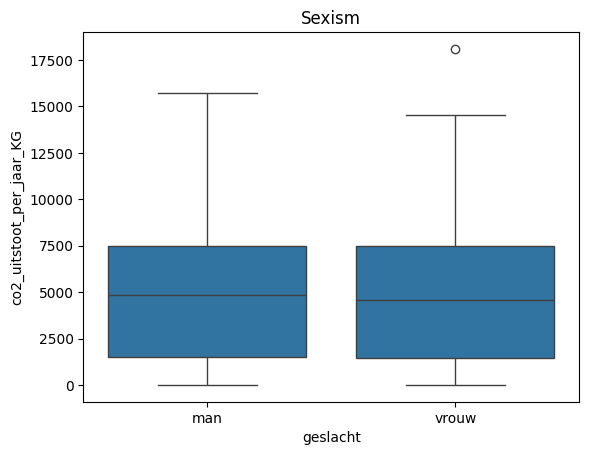

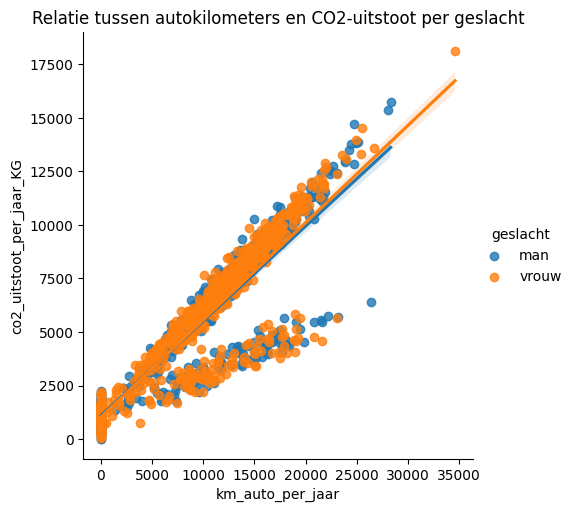

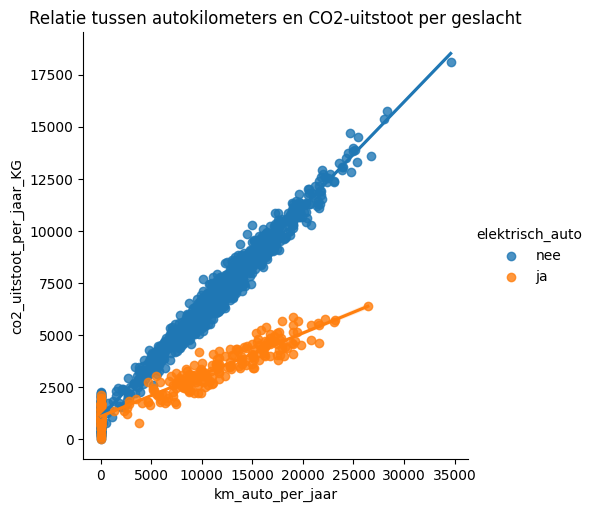

In [13]:
# 11
# Boxplot voor de geslachten
sns.boxplot(data=df_co2, x='geslacht', y='co2_uitstoot_per_jaar_KG')
plt.title("Sexism")
plt.show()

# Scatterplot met lijn voor geslacht
sns.lmplot(data=df_co2, x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', hue='geslacht')
plt.title('Relatie tussen autokilometers en CO2-uitstoot per geslacht')
plt.show()

# Scatterplot met lijn voor elektrisch auto bezit
sns.lmplot(data=df_co2, x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', hue='elektrisch_auto')
plt.title('Relatie tussen autokilometers en CO2-uitstoot per geslacht')
plt.show()

# Deel B: Kansrekenen

### 12.	Wat is de kans dat een willekeurig persoon 5000 KG CO2 uitstoot? Gebruik de standaard normaal verdeling in de berekening.

Om deze vraag te beantwoorden moeten we hem eerst verbeteren.<br>
Er wordt hier gevraagt om 5000 KG CO2, de kans hierop is 0% aangezien het een continue variabelen is.<br>
Om dit beter te kunnen uitrekenen kunnen we een range pakken zoals 4800 - 5200.<br>

In [14]:
# 12

def get_chance(mean, std, upper_range, lower_range):
    """Retourneerd de mogelijkheid dat een waarde tussen de range valt"""
    z1 = (lower_range - mean) / std
    z2 = (upper_range - mean) / std
    return stats.norm.cdf(z2) - stats.norm.cdf(z1)

prob = get_chance(4913.62, 3422.6, 5200, 4800)
print(f"Kans: {prob:.4f}")

Kans: 0.0466


### 13.	Op welke manier wordt, bij deze berekening, een van de technieken van calculus toegepast?

In het kort:
> Deze code gebruikt calculus via de techniek van bepaalde integratie om de oppervlakte onder de normale verdelinscurve tussen twee waarden te bepalen. Deze oppervlakte geeft dan de waarschijnlijkheid weer dat een waarde binnen dat bereik valt.

### 14.	Is deze kans groter, gelijk of kleiner bij mannen t.o.v. vrouwen?

Om dit te beantworden moeten we eers de dataset opslitsen op geslacht<br>
Vervolgens gebruiken we dezelfde statistische toets als van te voren<br>
Hier pakken we dan de correcte waarden uit en voeren dezelfde toets uit om op het antwoord te komen

In [15]:
# Man en vrouw datasets
df_vrouw = df_co2[df_co2['geslacht'] == 'vrouw']
df_man = df_co2[df_co2['geslacht'] == 'man']

# Correcte kollomen uit de datasets halen
car_vrouw = df_vrouw['co2_uitstoot_per_jaar_KG']
car_man = df_man['co2_uitstoot_per_jaar_KG']

# Statistische toets
print("Vrouw")
show_statistics(car_vrouw)
print("Man")
show_statistics(car_man)

Vrouw
--- co2_uitstoot_per_jaar_KG ---
Count       : 770.00
Mean        : 4850.82
Std         : 3414.58
Min         : 0.00
25%         : 1436.05
50%         : 4580.53
75%         : 7458.71
Max         : 18098.44
Median      : 4580.535
Skewness    : 0.46
Kurtosis    : -0.69
Null        : 0

Man
--- co2_uitstoot_per_jaar_KG ---
Count       : 717.00
Mean        : 4981.06
Std         : 3432.31
Min         : 0.00
25%         : 1511.55
50%         : 4825.42
75%         : 7504.90
Max         : 15739.69
Median      : 4825.42
Skewness    : 0.42
Kurtosis    : -0.72
Null        : 0



In [16]:
# Kansrekening uitvoeren op basis van dezelfde range
prob_vrouw = get_chance(4850.82, 3414.85, 5200, 4800)
prob_man = get_chance(4981.06, 3432.31, 5200, 4800)
print(f"Kans vrouw: {prob_vrouw:.4f}")
print(F"Kans man: {prob_man:.4f}")

Kans vrouw: 0.0467
Kans man: 0.0465


De kans is miniscuul groter bij vrouwen tenopzichte van mannen. De algemene kans voor mannen en vrouwen licht er net tussen in.<br>

# Deel C: Toetsende statistiek

### 15.	Stel de hypothesen op.

In de hypothese testen we altijd:<br>
> **Null hypothese *H0***: Er is geen significant verschil tussen de groep en de referentie.<br>

> **Alternatieve hypothese *H1***: Er is een significant verschil.<br>

Voor deze hypothese gaan wij het volgende uitzoeken. Is deze dataset accuraat op cijfers van Milieu Centraal (8 ton per jaar = 8000kg per jaar). Hiervoor hebben we het gemiddelde nodig van onze dataset.

In [17]:
co2_gemiddeld = df_co2['co2_uitstoot_per_jaar_KG'].dropna()
co2_milieu_centraal = 8000

t_statistic, p_value = stats.ttest_1samp(co2_gemiddeld, co2_milieu_centraal)

print(f"Gemiddeld van sample: {np.mean(co2_gemiddeld):.2f} kg")
print(f"T-statistic: {t_statistic:.3f}")
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Er is een significant verschil voor uitstoot van de gemiddelde Nederlander van 8000kg CO2.")
else:
    print("Er is geen significant verschil voor uitstoot van de gemiddelde Nederlander van 8000kg CO2.")

Gemiddeld van sample: 4913.62 kg
T-statistic: -34.773
P-value: 2.350418854732316e-194
Er is een significant verschil voor uitstoot van de gemiddelde Nederlander van 8000kg CO2.


### 16.	Welke type fouten kunnen er gemaakt worden?

Er zijn twee verschillende soorten fouten die je kan maken voor hypothese opstellen:<br>
> **Type I Error (α)**: De null hypothese niet aanemen terwijl zij wel waar is.<br>
    False positive<br>
    Voorbeeld: Je concludeert dat er een significant verschil is maar die is er niet.

> **Type II Error (β)**: De null hypothese aanemen terwijl zij niet waar is.<br>
    False negative<br>
    Voorbeeld: Je concludeert dat er geen significant verschil is maar die is er wel.

### 17.	Welke statistische toets moet je uitvoeren om te onderzoeken of er een significant verschil is?

Bla bla bla

### 18.	Voer de toets uit.

Bla bla bla. Kijk hier boven dan sukkel

### 19.	Geef in je eigen woorden een toelichting op de betekenis van de p-waarde.

#### Wat betekent de P-waarde?<br>
De **p-waarde** geeft de waarschijnlijkheid aan van het verkrijgen van de waargenomen resultaten, of extremer, als de nulhypothese waar zou zijn.<br>

In dit geval is de **nulhypothese** (H₀) dat er geen correlatie is tussen de variabelen die je test.<br>
> Een p-waarde van 2.35e-194 betekent dat er slechts een kans met 193 nullen is dat de waargenomen correlatie puur door toeval tot stand is gekomen, als er in werkelijkheid geen correlatie was.

### 20.	Welke conclusie kan je trekken?

Reject bitch, yeah!

# Deel D: Modelleren

In [29]:
# Importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Target and features
y = df_transformed["co2_uitstoot_per_jaar_KG"]
X = df_transformed[["km_auto_per_jaar", "elektrisch_auto_nee", "km_vliegtuig_per_jaar", "dagen_in_buitenland_per_jaar", "km_ov_per_jaar"]]

# Data cleaning
data = pd.concat([X, y], axis=1)
data_clean = data.dropna()
X = data_clean[X.columns]
y = data_clean[y.name]

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)
lin_scores = cross_val_score(lin_model, X, y, scoring='r2', cv=20)

# Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)
tree_scores = cross_val_score(tree_model, X, y, scoring='r2', cv=20)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
knn_scores = cross_val_score(knn_model, X, y, scoring='r2', cv=20)

### 21.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Op hoeveel verschillende mogelijkheden kan deze split gemaakt worden?

Als je n samples en k splitst voor training:<br>
> Aantal mogelijke splits: **C(n, k)**<br>

Hiervoor kunnen we **scipy.special.comb(n, k)** gebruiken

In [18]:
# 21

Omdat we later 20-fold cross validation gaan gebruiken geeft het ons 20 verschillende splits

### 22.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Welke metric zou je gebruiken om te toetsen hoe goed je model is en waarom?


Ik zou R^2 gebruiken, omdat deze aangeeft welk percentage van de variantie in CO2-uitstoot verklaard wordt door het model

Linear Regression mean R2: 0.9298320864386274
KNN Regressor mean R2: 0.9595125675861376
Decision Tree mean R2: 0.9765348682392435


/tmp/ipykernel_357/1364329999.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lin_scores, knn_scores, tree_scores], labels=["Linear", "KNN", "Tree"])


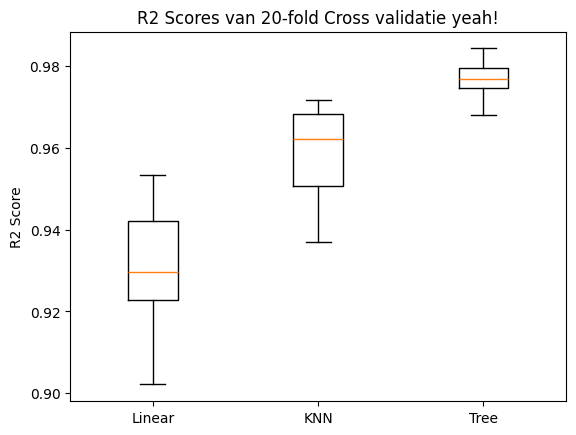

In [32]:
print("Linear Regression mean R2:", lin_scores.mean())
print("KNN Regressor mean R2:", knn_scores.mean())
print("Decision Tree mean R2:", tree_scores.mean())

plt.boxplot([lin_scores, knn_scores, tree_scores], labels=["Linear", "KNN", "Tree"])
plt.title("R2 Scores van 20-fold Cross validatie yeah!")
plt.ylabel("R2 Score")
plt.show()

In [34]:

# Linear vs Tree
_, p_val_lin_tree = stats.ttest_rel(tree_scores, lin_scores)
print("Tree vs Linear Regression p-value:", p_val_lin_tree)

# KNN vs Tree
_, p_val_knn_tree = stats.ttest_rel(tree_scores, knn_scores)
print("Tree vs KNN Regression p-value:", p_val_knn_tree)

Tree vs Linear Regression p-value: 5.004120356022845e-11
Tree vs KNN Regression p-value: 1.2296444048049271e-06


### 23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).

Yeah yeah yeah yeah

In [20]:
# 23

### 24.	Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.

Linear Regression vs Tree Regression / KNN

In [21]:
# 24

### 25.	Splits de target variabele op in 2 klassen, kies hiervoor een geschikte punt. Codeer de eerste groep als 0 en de tweede groep als 1. Welk model zou je nu kunnen gebruiken en waarom?


Waarde selecteren om de dataset op te splitsen. Vervolgens kunnen we hierop Logistic Regression gebruiken of een KNN Classifier

In [22]:
# 25

### 26.	Train een nieuw model op de nieuwe target, gebruik hierbij alleen de vijf meest invloedrijke onafhankelijke variabelen die je eerder hebt gekozen. Geef de wiskunde functie van dit model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).


1. De 5 meest belangrijke feeatures pakken
2. Een logistic regression model trainen
3. Geef de formule
4. groepsgenoot data invoeren

In [23]:
# 26

### 27.	Schrijf een conclusie op basis van de twee hoofdvragen van het portfolio (zie kopje ‘Vraagstellingen’)


In [24]:
# 27

###

In [2]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Other:
from scipy.stats import shapiro
from scipy.stats import iqr

# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
pd.set_option('display.max_columns', 10)

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

1.	Geef voor elke variabele in de dataset weer tot welk meetniveau deze behoort.



| **Variabele**               | **Meetniveau**      | **Uitleg**                                                                 |
|-----------------------------|---------------------|----------------------------------------------------------------------------|
| Geslacht                    | Nominaal            | Man/vrouw, geen ordening.                                                  |
| Leeftijd                    | Ratio               | Continue numerieke waarde (absoluut nulpunt = 0).                          |
| Gewicht (kg)                | Ratio               | Continue numerieke waarde.                                                 |
| Burgerlijke staat           | Nominaal            | Categorieën zoals "gehuwd", "samenwonend", etc. (geen rangorde).           |
| Jaarsalaris (€)             | Ratio               | Discreet* maar behandeld als continue variabele.                           |
| Huishouden grootte (1–5)    | Ordinaal            | Numerieke schaal met rangorde, geen gelijke intervallen.                   |
| Stad & Provincie            | Nominaal            | Categorieën zonder ordening (bijv. Amsterdam, Utrecht).                    |
| Opleidingsniveau            | Ordinaal            | Rangorde: MBO < HBO < WO.                                                  |
| Autobezit / Fietsbezit      | Nominaal            | Binaire variabele (ja/nee).                                                |
| Elektrische auto            | Nominaal            | Binaire variabele (ja/nee).                                                |
| Kilometers (auto/fiets/OV/vliegtuig) | Ratio       | Continue numerieke waarden.                                                |
| Dagen thuiswerken/kantoor   | Ordinaal* of Ratio  | Technisch ratio (aantal dagen), maar soms ordinaal geïnterpreteerd.        |
| Dagen in buitenland         | Ratio               | Numerieke telling.                                                         |
| Carsharing-gebruik          | Nominaal            | Categorieën (bijv. "nooit", "soms", "vaak").                               |
| CO₂-uitstoot (kg)           | Ratio               | Continue numerieke waarde.                                                 |


In [3]:
# 1
# Gemaakt in markdown. Wellicht hebben we het personen ID weggelaten, Deze gaan we toch niet gebruiken voor statistische onderzoeken.


2.	Waarom is het nodig om vooraf te bekijken tot welk meetniveau elke variabele behoort?

Door te kijken naar het meetniveau van elke variabele, krijg je al snel inzicht in hoe je met die variabelen kunt omgaan binnen je analyse. Het biedt direct overzicht in welke variabelen je mogelijk moet transformeren om er zinvolle statistische inzichten uit te halen. Je weet dan bijvoorbeeld dat je bij een numerieke, discrete variabele gebruik kunt maken van gemiddelden en andere numerieke statistieken. Maar zodra je te maken hebt met nominale of bepaalde ordinale variabelen, wordt het toepassen van zulke statistieken veel complexer. Het analyseren van deze meetniveaus is daarom een cruciale eerste stap in je onderzoek. Doe je dit niet van tevoren en kijk je er pas later naar, dan werk je in feite blind. Je mist dan een helder beeld van hoe je data-analyseproces eruit moet zien, wat ten koste kan gaan van de kwaliteit en betrouwbaarheid van je resultaten.

3.	Ga na of er missende/niet kloppende/extreme waarden zijn in de dataset en ga hier op een adequate manier mee om.

Missende waarden percentage
co2_uitstoot_per_jaar_KG    0.47
jaarsalaris_eu              0.07
stad                        0.07
opleiding_niveau            0.07
autobezit                   0.07
dtype: float64
Extreme waarden gedetecteerd in: co2_uitstoot_per_jaar_KG


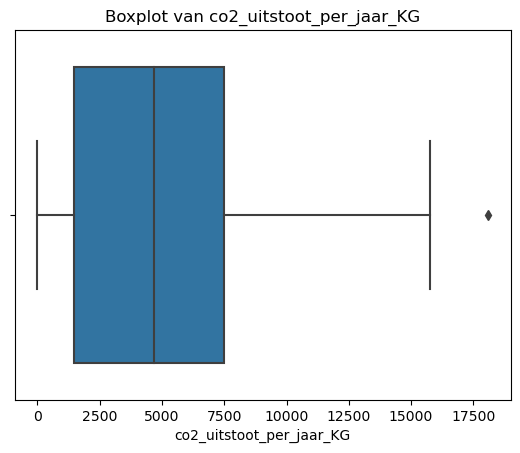

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: gewicht_KG


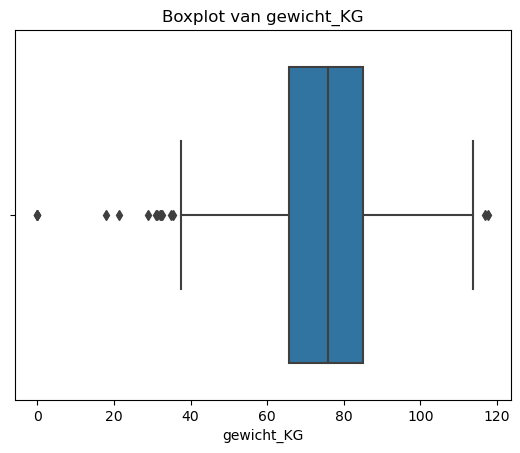

Aantal extreme waarden: 6
Percentage extreme waarden: 0.40%
Extreme waarden gedetecteerd in: jaarsalaris_eu


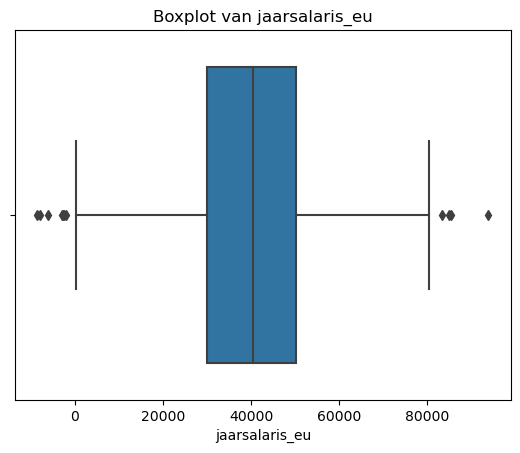

Aantal extreme waarden: 5
Percentage extreme waarden: 0.33%
Extreme waarden gedetecteerd in: km_auto_per_jaar


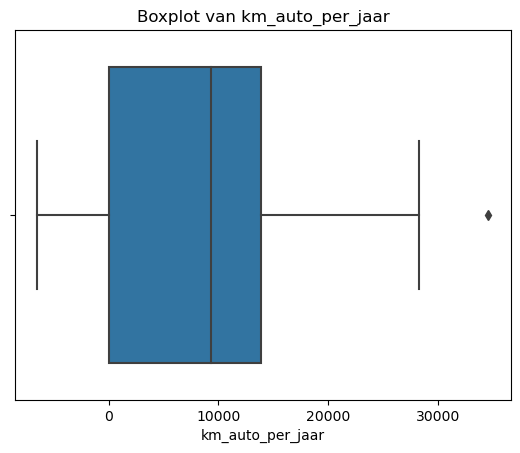

Aantal extreme waarden: 1
Percentage extreme waarden: 0.07%
Extreme waarden gedetecteerd in: km_ov_per_jaar


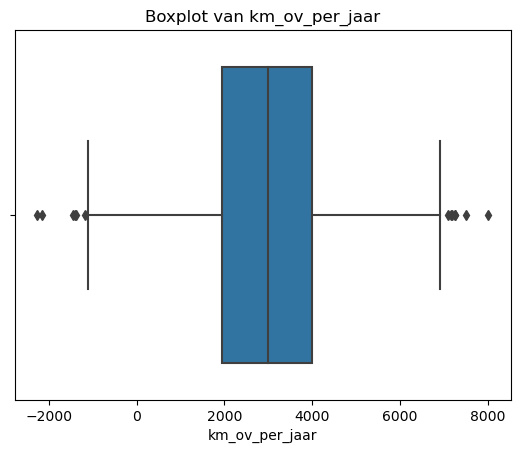

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: km_vliegtuig_per_jaar


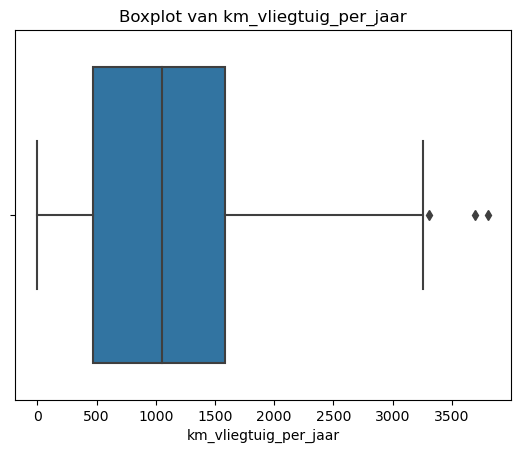

Aantal extreme waarden: 2
Percentage extreme waarden: 0.13%


In [4]:
# 3
# import z-score
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Eerst missende waarden:
mv = df_co2.isnull().mean() * 100
print("Missende waarden percentage")
print(mv[mv > 0].sort_values(ascending=False).round(2))

# Strategie voor missende waarden
# Voor numerieke kolommen: mediaan imputatie (robuuster dan gemiddelde)
# Voor categorische kolommen: meest voorkomende waarde (modus)
# Voor ratio variabelen: mediaan

# Numerieke kolommen
numeric_cols = df_co2.select_dtypes(include=[np.number]).columns.difference(['persoon_ID'])
for col in numeric_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].median())

# Categorische kolommen
categorical_cols = df_co2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].mode()[0])

# Extreme waarden
threshold = 3
columns_to_check = numeric_cols

# Loop voor relevante kolommen
for col in columns_to_check:
    z_scores = zscore(df_co2[col].dropna())
    extreme_mask = np.abs(z_scores) > threshold

    if extreme_mask.any():
        print(f"Extreme waarden gedetecteerd in: {col}")
        sns.boxplot(x=df_co2[col])
        plt.title(f"Boxplot van {col}")
        plt.show()
        
        # Print aantal extreme waarden
        n_extreme = extreme_mask.sum()
        print(f"Aantal extreme waarden: {n_extreme}")
        print(f"Percentage extreme waarden: {(n_extreme/len(df_co2))*100:.2f}%")

In dit deel van de code hebben we eerst onderzocht waar er sprake is van missende waarden, door per kolom het percentage ontbrekende data te berekenen. Wat hierbij opvalt, is dat de kolom met CO₂-uitstoot per jaar (in kilogram) een percentage ontbrekende waarden heeft van ongeveer 4,7%. Dat is relatief beperkt en hoeft geen groot probleem te vormen voor verdere analyse of modellering.

Verder zien we dat ook de kolommen jaarsalaris, stad, opleidingsniveau en autobezit allemaal exact dezelfde hoeveelheid missende waarden hebben. Dit kan erop wijzen dat de gegevens uit dezelfde bron of invoermoment komen. Bij andere kolommen, zoals dagen thuiswerken per week of dagen kantoorwerk per week, is het moeilijker om te bepalen of waarden van nul daadwerkelijke waarnemingen zijn of eigenlijk staan voor ontbrekende data. Hier moeten we dus extra voorzichtig mee omgaan.

Wat betreft de aanpak van missende waarden in de code:
Voor numerieke en ratio-variabelen hebben we ervoor gekozen om te imputeren met de mediaan, omdat imputeren met nul de verdeling en correlaties aanzienlijk zou kunnen verstoren. Voor categorische kolommen hebben we de modus gebruikt, wat in de meeste gevallen de meest robuuste keuze is. Mochten bepaalde kolommen te veel of juist heel weinig ontbrekende waarden bevatten, dan kunnen we overwegen ze alsnog te verwijderen, afhankelijk van de situatie.

De imputatie hebben we geïmplementeerd met behulp van for-loops. Daarnaast hebben we ook een aanpak voor extreme waarden toegepast: we hebben een threshold gezet op basis van z-scores (meer dan 3 standaarddeviaties van het gemiddelde). Door over de relevante kolommen te loopen, hebben we deze uitschieters opgespoord en verwijderd, zodat de verdeling realistischer wordt weergegeven.

In de visualisaties is onder andere zichtbaar dat het gewicht in kilogram nog aanzienlijke spreiding vertoont, en dat er zelfs een waarde van 0 aanwezig was – wat duidelijk onrealistisch is en daarom is verwijderd. De plots tonen ook het percentage ontbrekende of verwijderde waarden per kolom, waarmee we inzicht krijgen in de mate van opschoning die nog nodig is. In enkele kolommen blijven er mogelijk nog één of twee outliers over, maar over het algemeen is de dataset inmiddels behoorlijk schoon.

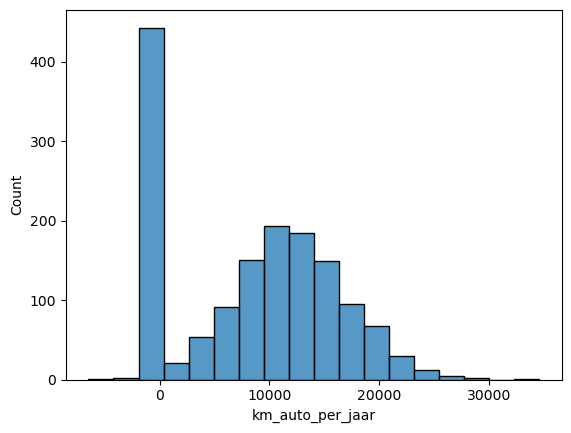

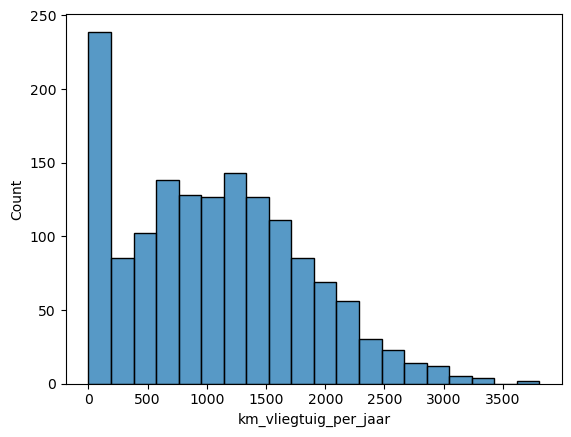

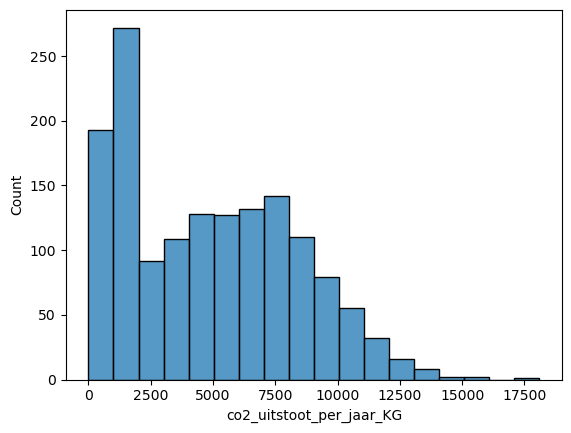

In [5]:
# 4
# heatmap
#numeric_cols = df_co2.select_dtypes(include=['int64', 'float64']).columns
#df_numeric = df_co2[numeric_cols]
#plt.figure(figsize=(10, 5))
#sns.heatmap(df_numeric.corr(), annot=True)
#plt.show()

# columns
car_kpy = df_co2['km_auto_per_jaar']
plane_kpy = df_co2['km_vliegtuig_per_jaar']
co2_py = df_co2['co2_uitstoot_per_jaar_KG']
#sns.regplot(x=car_kpy, y=co2_py)
#plt.show()
#sns.regplot(x=plane_kpy, y=co2_py)
#plt.show()

# hist plot
def hist_plot_maker(data, x):
    sns.histplot(data=data, x=x)
    plt.show()
hist_plot_maker(df_co2, car_kpy)
hist_plot_maker(df_co2, plane_kpy)
hist_plot_maker(df_co2, co2_py)

Twee kolommen die ik heb geselecteerd vanwege een mogelijke correlatie of invloed op de variabele "co2_uitstoot_per_jaar_KG" zijn "km_auto_per_jaar" en "km_vliegtuig_per_jaar". Ik heb juist voor deze twee gekozen omdat het om veelgebruikte vervoersmiddelen gaat, die bovendien bekend staan om hun relatief hoge brandstofverbruik.

Op de heatmap van de correlatiematrix is te zien dat deze aanname grotendeels klopt: beide variabelen vertonen inderdaad een van de sterkste correlaties met de CO₂-uitstoot. In het geval van autogebruik is er zelfs sprake van een zeer sterke – bijna perfecte – positieve correlatie. Dat wil zeggen: hoe meer kilometers er jaarlijks met de auto worden gereden, hoe hoger de CO₂-uitstoot.

Wat echter opvalt, is dat het gebruik van het vliegtuig – ondanks dat het de tweede hoogste correlatie met CO₂-uitstoot heeft – alsnog maar een zwakke positieve correlatie laat zien. Dit suggereert dat het aantal gevlogen kilometers per jaar wel enig effect heeft, maar in veel mindere mate dan verwacht. Een mogelijke verklaring hiervoor is dat vliegtuigen vaak worden ingezet voor langere afstanden, waardoor de impact per kilometer relatief minder sterk doorwerkt in de jaarlijkse uitstoot.

Voor de visualisatie heb ik gekozen voor een histogram, omdat dit type plot een goed beeld geeft van de verdeling van de waarden binnen een variabele.

Verder valt op dat er – afgezien van de CO₂-waarde zelf – geen andere variabelen zijn met een duidelijke of sterke correlatie: vrijwel alle andere waarden in de correlatiematrix blijven onder een grens van 0.1. Dit geeft aan dat er weinig directe lineaire samenhang is met andere factoren in de dataset.

Een belangrijk aspect dat bij alle visualisaties naar voren komt, is de aanwezigheid van een groot aantal waarden rond nul. Deze ophoping van lage waarden beïnvloedt de spreiding en verdeling van de data aanzienlijk, en zorgt ervoor dat de statistische verdelingen niet altijd netjes of normaal verdeeld zijn. Dit was ook de reden waarom ik ervoor heb gekozen om de interkwartielafstand (IQR) te gebruiken in plaats van het bereik (min-max), omdat IQR robuuster is voor scheve of asymmetrische verdelingen en minder gevoelig voor outliers.

Analyse per variabele:
1. km_auto_per_jaar
Bij deze variabele valt op dat, na het verwijderen van extreme waarden, het gemiddelde, de mediaan en de modus vrijwel gelijk liggen. Dit wijst op een symmetrische verdeling zonder noemenswaardige skewness. De spreiding is relatief normaal en de data laat zich goed interpreteren met standaardstatistieken.

2. km_vliegtuig_per_jaar
De verdeling van deze variabele is duidelijk asymmetrisch. Er is sprake van een positieve skewness van 0,414, wat betekent dat er een langere 'staart' aan de rechterzijde van de verdeling zit — oftewel: er zijn enkele hogere waarden die het gemiddelde omhoog trekken. Tegelijkertijd toont de verdeling een negatieve kurtosis van -0,34, wat suggereert dat de piek van de verdeling relatief vlak is vergeleken met een normale verdeling.

3. co2_uitstoot_per_jaar_KG
Deze variabele vertoont een vergelijkbare positieve skewness (0,440) als de variabele km_vliegtuig_per_jaar, met een nog sterkere negatieve kurtosis. Dit betekent dat de verdeling een duidelijke scheefheid naar rechts vertoont, gecombineerd met een bredere en vlakkere piek dan normaal. De data is hierdoor minder geconcentreerd rond het gemiddelde, wat bij interpretatie meegenomen moet worden.



In [6]:
# 5
# function with column statistics
def show_statistics(var):
    print(var.describe())
    print(f"Median: {var.median()}")
    print(f"Skewness: {var.skew()}")
    print(f"Kurtosis: {var.kurt()}")
    print(f"IQR: {iqr(var)}")
    print(f"Null: {var.isnull().sum()}")
print("--- km_auto_per_jaar ---")
show_statistics(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
show_statistics(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
show_statistics(co2_py)

--- km_auto_per_jaar ---
count     1500.000000
mean      8597.262393
std       7021.428530
min      -6506.630000
25%          0.000000
50%       9356.380000
75%      13842.732500
max      34618.870000
Name: km_auto_per_jaar, dtype: float64
Median: 9356.380000000001
Skewness: 0.1678828783231597
Kurtosis: -0.960381076063419
IQR: 13842.7325
Null: 0
--- km_vliegtuig_per_jaar ---
count    1500.000000
mean     1072.277327
std       748.651072
min         0.000000
25%       471.540000
50%      1052.140000
75%      1588.555000
max      3808.200000
Name: km_vliegtuig_per_jaar, dtype: float64
Median: 1052.1399999999999
Skewness: 0.41399042702396605
Kurtosis: -0.3404479466219743
IQR: 1117.015
Null: 0
--- co2_uitstoot_per_jaar_KG ---
count     1500.000000
mean      4911.244920
std       3414.938547
min          0.000000
25%       1471.517500
50%       4677.280000
75%       7471.172500
max      18098.440000
Name: co2_uitstoot_per_jaar_KG, dtype: float64
Median: 4677.28
Skewness: 0.4425691062545293


6.	Toets, met behulp van statistiek, of de verdelingen (vraag 4) normaal verdeeld zijn.

Wij hebben een functie gemaakt die de Shapiro-test gebruikt om te bepalen of de verdelingen normaal zijn. Deze test is niet perfect, maar in combinatie met de statistieken uit de vorige opdracht geeft het wel een goed beeld van hoe de data verdeeld is.

We hebben een p-waarde van 0,05 als grens gebruikt, omdat dit een gangbare drempel is in statistische toetsen. Als de p-waarde groter is dan 0,05, dan gaan we ervan uit dat de data normaal verdeeld is.

In [7]:
# 6
def normaal_verdeeld(var):
    stat, p = shapiro(var)
    print(f"Normaal Verdeeld: {p > 0.05} ({p})")

print("--- km_auto_per_jaar ---")
normaal_verdeeld(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
normaal_verdeeld(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
normaal_verdeeld(co2_py) # p van 1 kan niet hier kloppen...

--- km_auto_per_jaar ---
Normaal Verdeeld: False (8.351651722054391e-28)
--- km_vliegtuig_per_jaar ---
Normaal Verdeeld: False (1.8340720034474885e-18)
--- co2_uitstoot_per_jaar_KG ---
Normaal Verdeeld: False (3.329854456141171e-24)


7.	Om ervoor te zorgen dat de onafhankelijke variabelen gebruikt kunnen worden voor Machine Learning moeten ze getransformeerd worden. Geef per meetniveau aan wat er moet gebeuren en waarom.

Om te bepalen hoe we de data moeten transformeren, is het belangrijk eerst goed te begrijpen wat het meetniveau van elke variabele betekent. Dat bepaalt namelijk hoe we ermee om moeten gaan in het model.

Nominale variabelen, zoals geslacht of provincie, zijn categorisch zonder vaste volgorde. Deze moeten worden omgezet naar dummyvariabelen met one-hot encoding. Zo kan het model de verschillende categorieën gebruiken zonder te denken dat er een bepaalde volgorde in zit.

Ordinale variabelen, zoals opleidingsniveau of huishoudgrootte op een schaal van 1 tot 5, hebben wél een vaste volgorde. Deze zetten we om naar numerieke waarden met een logische volgorde, bijvoorbeeld via een mapping. Zo begrijpt het model dat een hogere waarde iets betekent, zonder dat het rekent alsof het echte getallen zijn zoals bij ratio.

Interval- en ratio-variabelen, zoals leeftijd, gewicht of kilometers per jaar, zijn continue numerieke waarden. Deze worden meestal gestandaardiseerd (bijvoorbeeld met een z-score) zodat de schaalverschillen tussen variabelen worden opgeheven en ze beter met elkaar te vergelijken zijn. Ratio-variabelen beginnen bij nul, maar worden verder op dezelfde manier behandeld als intervaldata.

Er zijn ook variabelen die op het eerste gezicht ratio lijken, zoals dagen thuiswerken per week, maar die in sommige contexten beter als ordinaal kunnen worden gezien — zeker als er een specifieke relatie wordt verwacht met de uitkomstvariabele, zoals CO₂-uitstoot. Het is daarom belangrijk om per geval af te wegen hoe we ze definiëren.

Verder is het cruciaal dat de data wordt voorbereid als een schone DataFrame of NumPy array, zonder ontbrekende waarden, en in numeriek formaat — anders kunnen veel modellen er niet mee overweg.

Tot slot hebben we ook gekeken naar de verdeling van de data. In sommige gevallen kunnen we de verdeling proberen normaal te maken met transformaties. Als dat niet lukt, dan moeten we mogelijk overstappen op non-parametrische methoden, zoals een beslisboom, die minder gevoelig zijn voor verdelingsvormen. Ook is het goed om te onthouden dat de keuze tussen parametrisch en non-parametrisch afhangt van hoe goed de data aan de aannames voldoet, zoals normaliteit en lineariteit.

In [37]:
from sklearn.preprocessing import StandardScaler

# definieeren mappings voor ordinalen
ordinale_vars = {
    'opleiding_niveau': {'MBO': 1, 'HBO': 2, 'WO': 3},
    'gebruik_carsharing': {'Nooit': 1, 'Heel soms': 2, 'Soms': 3, 'Vaak': 4, 'Altijd': 5}
}

# Columns per type
nominale_vars = ['geslacht', 'provincie', 'stad', 'burgerlijke_staat', 'autobezit', 'fietsbezit', 'elektrisch_auto']
ratio_vars = ['leeftijd', 'gewicht_KG', 'jaarsalaris_eu', 'huishouden_grootte', 'km_auto_per_jaar', 'km_fiets_per_jaar', 'km_ov_per_jaar', 'km_vliegtuig_per_jaar', 'dagen_thuiswerken_per_week_pro_rato', 'dagen_kantoorwerken_per_week_pro_rato', 'dagen_in_buitenland_per_jaar', 'co2_uitstoot_per_jaar_KG']

# Transform dataframe in 1 keer
df_mod = (
    df_co2
    .assign(**{col: df_co2[col].map(mapping) for col, mapping in ordinale_vars.items()})  # Mappen van ordinalen
    .pipe(pd.get_dummies, columns=nominale_vars, drop_first=True)                         # One-hot encoding
)

# Split first
X = df_mod.drop(columns=['co2_uitstoot_per_jaar_KG'])
y = df_mod['co2_uitstoot_per_jaar_KG']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Then scale only on training data
scaler = StandardScaler()
X_train[ratio_vars[:-1]] = scaler.fit_transform(X_train[ratio_vars[:-1]])  # exclusie van target
X_test[ratio_vars[:-1]] = scaler.transform(X_test[ratio_vars[:-1]])

# We doen het op deze manier omdat we zo data lekken voorkomen tijdens de fit van het model.


Ik heb copies gemaakt van dataframes om de organelle niet te veranderen. Daarna heb ik aanpassingen gemaakt op basis van opdracht 1 voor de kolommen. 


Wij hebben besloten om onze bevindingen en de relaties tussen de variabelen in opdracht 9 concreet uit te leggen. Zo vermijden we dat we het te gecompartmentaliseerd houden en zorgen ervoor dat het duidelijk in één deel verwerkt is, zonder verwarring te veroorzaken.

C:\Users\ruudl\AppData\Local\Temp\ipykernel_2992\1240013198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_matrix = df_co2.corr(method='pearson')
C:\Users\ruudl\AppData\Local\Temp\ipykernel_2992\1240013198.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_matrix = df_co2.corr(method='spearman')


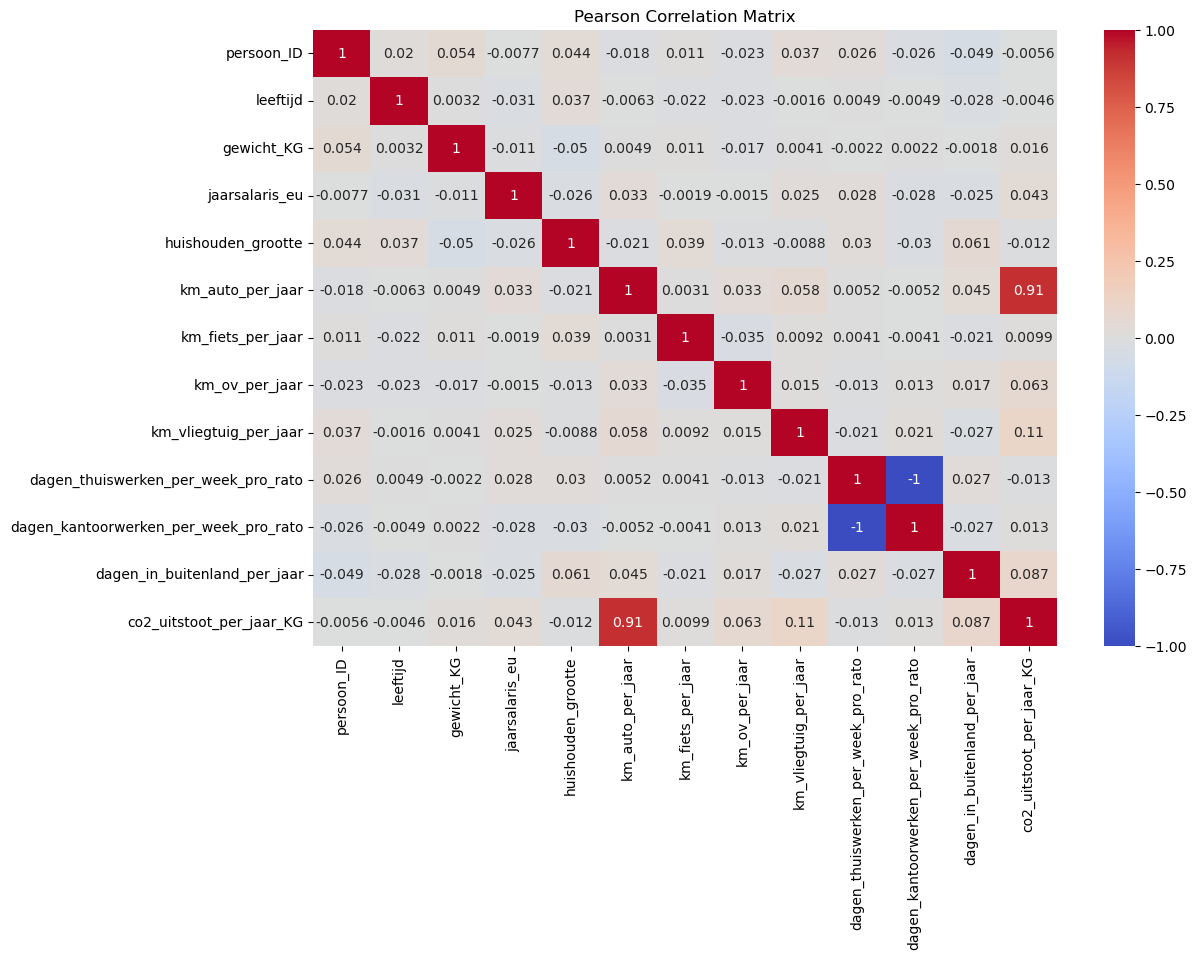

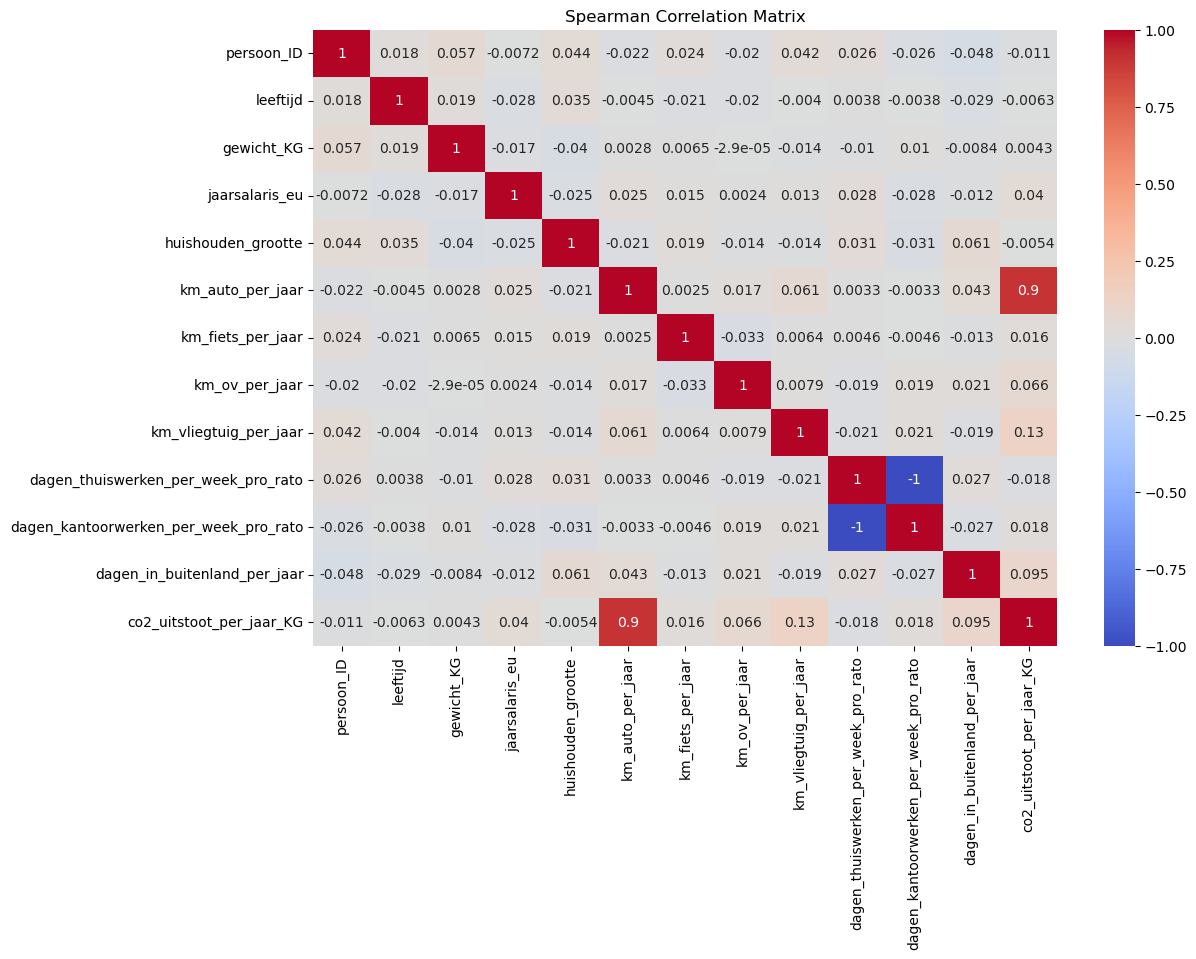

In [21]:
# Pearson correlation matrix (default)
pearson_matrix = df_co2.corr(method='pearson')

# Spearman correlation matrix
spearman_matrix = df_co2.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Matrix")
plt.show()

9.	Welke methode(n) heb je gebruikt en waarom?

De methode die we hebben toegepast is het gebruik van zowel een Spearman- als een Pearson-correlatiematrix. Op die manier kunnen we voor elke variabele nagaan hoe sterk de correlatie is met de CO₂-uitstoot, maar ook met alle andere kolommen. De Pearson-correlatie geeft ons inzicht in lineaire verbanden, terwijl Spearman ons helpt om ook niet-lineaire relaties op te sporen — zelfs wanneer de data niet normaal verdeeld is. Zo kunnen we de verschillen en overeenkomsten tussen beide methodes vergelijken en de robuustheid van bepaalde verbanden beter inschatten.

Er is duidelijk sprake van multicollineariteit in de dataset. Een goed voorbeeld is de relatie tussen autobezit en het aantal jaarlijkse autokilometers. Die twee staan vrijwel altijd in verband: iemand zonder auto zal in de meeste gevallen ook weinig tot geen kilometers met een eigen auto rijden. Alleen in uitzonderlijke gevallen, zoals mensen die uitsluitend in andermans auto rijden, geldt dat niet.

Een vergelijkbare relatie bestaat tussen fietseigendom en het aantal gefietste kilometers per jaar. Iemand die een fiets bezit, zal logischerwijs eerder fietsen dan iemand zonder fiets. Ook hier is sprake van een sterke lineaire samenhang.

Daarnaast is er een bijna perfecte negatieve correlatie tussen het aantal dagen thuiswerken en het aantal dagen op kantoor werken. Aangezien een werkweek meestal uit vijf dagen bestaat, betekent meer thuiswerken automatisch minder dagen op kantoor, en omgekeerd. Dit is een structureel verband, wat een bijna perfecte lineaire relatie veroorzaakt.

Deze variabelen zouden we eventueel kunnen verwijderen of samenvoegen, tenzij ze afzonderlijk nog inhoudelijk belangrijk zijn voor de analyse of interpretatie van het model.

In [9]:
# 11. Relatie tussen CO2 uitstoot en andere variabelen per geslacht


# Print correlations per gender
print("\nCorrelaties voor mannen:")
print(df_co2[df_co2['geslacht'] == 'man'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))
print("\nCorrelaties voor vrouwen:")
print(df_co2[df_co2['geslacht'] == 'vrouw'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))


Correlaties voor mannen:
co2_uitstoot_per_jaar_KG                 1.000000
km_auto_per_jaar                         0.910088
km_vliegtuig_per_jaar                    0.094955
dagen_in_buitenland_per_jaar             0.065944
km_ov_per_jaar                           0.050139
gewicht_KG                               0.039916
jaarsalaris_eu                           0.033233
dagen_thuiswerken_per_week_pro_rato      0.023034
leeftijd                                 0.020651
km_fiets_per_jaar                        0.004470
persoon_ID                               0.000165
dagen_kantoorwerken_per_week_pro_rato   -0.023034
huishouden_grootte                      -0.039512
Name: co2_uitstoot_per_jaar_KG, dtype: float64

Correlaties voor vrouwen:
co2_uitstoot_per_jaar_KG                 1.000000
km_auto_per_jaar                         0.911800
km_vliegtuig_per_jaar                    0.112621
dagen_in_buitenland_per_jaar             0.106692
km_ov_per_jaar                           0.075410


C:\Users\ruudl\AppData\Local\Temp\ipykernel_2992\2843306156.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_co2[df_co2['geslacht'] == 'man'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))
C:\Users\ruudl\AppData\Local\Temp\ipykernel_2992\2843306156.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_co2[df_co2['geslacht'] == 'vrouw'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))


Als we kijken naar de relaties tussen CO2-uitstoot en andere variabelen, uitgesplitst naar geslacht, komen we in grote lijnen niet tot andere conclusies dan in opdracht 8 en 9. Wel vallen er een paar opvallende verschillen op. Zo tonen vrouwen bijvoorbeeld sterkere correlaties met het aantal dagen dat ze per jaar in het buitenland doorbrengen dan mannen. Dit verandert de eerdere bevindingen echter niet fundamenteel.

Er kunnen zeker variaties zijn in hoe correlaties zich gedragen binnen de groepen mannen en vrouwen, en dit is iets wat we later in onze modellen kunnen meenemen om onze hypotheses verder te onderzoeken. Op bepaalde variabelen zien we dat de correlatie met CO2-uitstoot bij het ene geslacht sterker is dan bij het andere, wat aangeeft dat het zinvol kan zijn om geslacht mee te nemen als factor in onze modellering.

Kortom: ja, de inzichten verschillen enigszins van wat we in opdracht 8 en 9 hebben besproken, vooral wanneer we de data per geslacht bekijken. Maar momenteel hebben we niet per se het idee dat we dit onderscheid volledig moeten gaan bevorderen als het op onze hypothese vorming neer zal gaan komen.

12.	Wat is de kans dat een willekeurig persoon 5000 KG CO2 uitstoot? Gebruik de standaard normaal verdeling in de berekening.

In [15]:
# 12
from scipy.stats import norm # Deze module hebben we nodig

mean = df_co2['co2_uitstoot_per_jaar_KG'].mean()
std = df_co2['co2_uitstoot_per_jaar_KG'].std()

z_score = (5000 - mean) / std # Z-score om te kijken hoeveel standaard deviaties 5000 is van de 'norm'

lower_bound = 4950
upper_bound = 5050

# Kansbereken
prob_less_than_5000 = norm.cdf(z_score)   # P(X < 5000)
prob_more_than_5000 = 1 - prob_less_than_5000  # P(X > 5000)

# Omdat het onmogelijk is om precies 5000 kg uit te stoten, zullen we een interval kiezen van 4950 tot en met 5050 om zo het interval te berekenen. De precieze kans kan je niet weten doordat niemand precies op 5000 kg uitstoot zal zitten. Iedereen zal of net iets erboven of net iets eronder zitten.
p = norm.cdf(upper_bound, loc=mean, scale=std) - norm.cdf(lower_bound, loc=mean, scale=std)

print(f"Kans dat iemand een Co2 uitstoot heeft tussen 4950 en 5050kg: {p:.4f}")

Kans dat iemand een Co2 uitstoot heeft tussen 4950 en 5050kg: 0.0117


13.	Op welke manier wordt, bij deze berekening, een van de technieken van calculus toegepast?

Omdat je werkt met een continue kansverdeling, kun je niet de kans berekenen dat iemand exact 5.000 kg CO₂ uitstoot — die kans is nul. In plaats daarvan bereken je de kans dat de uitstoot binnen een interval rond 5.000 kg ligt.

14.	Is deze kans groter, gelijk of kleiner bij mannen t.o.v. vrouwen?

In [18]:
# 14
vrouw_df = df_co2[df_co2['geslacht'] == 'vrouw']
man_df = df_co2[df_co2['geslacht'] == 'man']

mean_man = man_df['co2_uitstoot_per_jaar_KG'].mean()
std_man = man_df['co2_uitstoot_per_jaar_KG'].std()

mean_vrouw = vrouw_df['co2_uitstoot_per_jaar_KG'].mean()
std_vrouw = vrouw_df['co2_uitstoot_per_jaar_KG'].std()

# Interval rond 5.000 kg
lower_bound = 4950
upper_bound = 5050

# Voor mannen
p_man = norm.cdf(upper_bound, loc=mean_man, scale=std_man) - norm.cdf(lower_bound, loc=mean_man, scale=std_man)

# Voor vrouwen
p_vrouw = norm.cdf(upper_bound, loc=mean_vrouw, scale=std_vrouw) - norm.cdf(lower_bound, loc=mean_vrouw, scale=std_vrouw)

print(f"Kans dat een man ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): {p_man:.4f}")
print(f"Kans dat een vrouw ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): {p_vrouw:.4f}")

# De kans is een fractie van een percentage hoger voor vrouwen, met maar 0,01%

Kans dat een man ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): 0.0116
Kans dat een vrouw ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): 0.0117


15.	Stel de hypothesen op.

Voor onze hypotheses zullen we meerdere varianten formuleren. Dat betekent dat we ook meerdere nulhypotheses én bijbehorende alternatieve hypotheses zullen opstellen.

De eerste nulhypothese die we voorstellen, is dat er geen significant verschil bestaat in de jaarlijkse CO₂-uitstoot tussen mannen en vrouwen. De bijbehorende alternatieve hypothese stelt dat er wel een significant verschil is in uitstoot tussen deze twee groepen.

Daarnaast formuleren we een tweede alternatieve hypothese binnen ditzelfde thema, namelijk dat het verschil in CO₂-uitstoot tussen mannen en vrouwen mede verklaard kan worden door een andere variabele (zoals bijvoorbeeld mobiliteitsgedrag of werksituatie).

Voor onze tweede concrete hypothese gaan we mobiliteitsgedrag vergelijken met CO₂-uitstoot. De nulhypothese hier is dat het gebruik van het openbaar vervoer, de auto of het vliegtuig geen significante relatie heeft met de jaarlijkse uitstoot. De alternatieve hypothese stelt dat het aantal autokilometers positief gecorreleerd is met de jaarlijkse CO₂-uitstoot.

Een verder verfijnde alternatieve hypothese binnen dit thema is dat het aantal autokilometers, in combinatie met het aantal dagen op kantoor en het aantal dagen in het buitenland, samen de grootste bijdrage levert aan CO₂-uitstoot. Daarnaast kan ook gesteld worden dat het vliegtuiggebruik en internationale reisgedrag de sterkste voorspellers zijn van hoge uitstoot — dat vormt een aanvullende hypothese binnen deze mobiliteitscategorie.

Voor de derde hypothese richten we ons op sociaal-demografische factoren. De nulhypothese is dat huishoudgrootte en provincie geen invloed hebben op de CO₂-uitstoot van individuen. De alternatieve hypothese luidt dat mensen in grotere huishoudens, of in specifieke provincies, gemiddeld meer of juist minder uitstoten dan anderen.

16.	Welke type fouten kunnen er gemaakt worden?

Een type I-fout maak je als je denkt dat er een effect is terwijl dat er niet is (bijv. je verwerpt de nulhypothese van geen geslachtsverschil in CO₂-uitstoot, terwijl die wél klopt). Een type II-fout is juist het omgekeerde: je mist een echt effect (bijv. je accepteert dat er geen verschil is, terwijl er wel degelijk een is). Dit geldt voor al onze hypotheses: over geslacht, mobiliteit en sociaaleconomische factoren. 

17.	Welke statistische toets moet je uitvoeren om te onderzoeken of er een significant verschil is?

Per type variabele pas je fundamenteel verschillende toetsen toe om significante verschillen te onderzoeken. Voor categorische variabelen gebruik je bijvoorbeeld de chi-kwadraattest. Bij numerieke continue variabelen is een Pearson correlatietoets geschikt om de sterkte en significantie van een relatie te meten. Een t-test gebruik je goed om verschillen tussen nominale groepen en numerieke variabelen te onderzoeken. Voor het vergelijken van meerdere groepen op numerieke variabelen is de ANOVA-test geschikt.

We hebben uiteindelijk die vier verschillende statistische tests uitgevoerd, om relaties tussen kolommen op basis van hun meetniveau en hypothese relevancie te analyseren:

1. Chi-kwadraattest voor relaties tussen categorische variabelen.

2. ANOVA voor numerieke variabelen tegenover categorische variabelen.

3. T-test voor geslacht versus numerieke variabelen.

4. Pearson-correlatie voor relaties tussen numerieke variabelen onderling.

18.	Voer de toets uit.

In [24]:
from scipy.stats import ttest_ind, pearsonr, f_oneway
import pandas as pd

# We filteren de rijen met ontbrekende CO2 waardes zodat we consistente tests kunnen uitvoeren.
df = df_co2.dropna(subset=['co2_uitstoot_per_jaar_KG'])

# 1. T-test: Geslacht vs CO₂-uitstoot
man = df[df['geslacht'] == 'man']['co2_uitstoot_per_jaar_KG']
vrouw = df[df['geslacht'] == 'vrouw']['co2_uitstoot_per_jaar_KG']
t_stat, p_val = ttest_ind(man, vrouw)
print(f"T-test (geslacht vs CO₂): t = {t_stat:.2f}, p = {p_val:.4f}")

# 2. Pearson correlation voor Mobiliteitsgedrag vs CO2 door verschillende afhankelijkheden te proberen
mobiliteits_vars = ['km_auto_per_jaar', 'km_vliegtuig_per_jaar',
                    'km_ov_per_jaar', 'dagen_in_buitenland_per_jaar',
                    'dagen_kantoorwerken_per_week_pro_rato',
                    'dagen_thuiswerken_per_week_pro_rato']

for var in mobiliteits_vars:
    corr, p_val = pearsonr(df[var], df['co2_uitstoot_per_jaar_KG'])
    print(f"Pearson correlatie ({var} vs CO₂): r = {corr:.2f}, p = {p_val:.4f}")

# 3. ANOVA: Provincie vs CO₂
prov_groups = [g['co2_uitstoot_per_jaar_KG'] for _, g in df.groupby('provincie')]
f_stat, p_val = f_oneway(*prov_groups)
print(f"ANOVA (provincie vs CO₂): F = {f_stat:.2f}, p = {p_val:.4f}")

# 4. ANOVA: Huishouden_grootte gecategoriseerd vs CO₂
df['huish_cat'] = pd.cut(df['huishouden_grootte'], bins=[0, 1, 2, 4, 10],
                         labels=['alleen', 'klein', 'middelgroot', 'groot'])
hh_groups = [g['co2_uitstoot_per_jaar_KG'] for _, g in df.groupby('huish_cat')]
f_stat, p_val = f_oneway(*hh_groups)
print(f"ANOVA (huishouden_grootte vs CO₂): F = {f_stat:.2f}, p = {p_val:.4f}")

# 5. Ordinale correlatie: Opleiding vs CO2 # Voor demografische hypothese stelling
opleiding_map = {'MBO': 1, 'HBO': 2, 'WO': 3}
df['opleiding_num'] = df['opleiding_niveau'].map(opleiding_map)
corr, p_val = pearsonr(df['opleiding_num'], df['co2_uitstoot_per_jaar_KG'])
print(f"Pearson correlatie (opleiding vs CO₂): r = {corr:.2f}, p = {p_val:.4f}")

T-test (geslacht vs CO₂): t = 0.84, p = 0.4030
Pearson correlatie (km_auto_per_jaar vs CO₂): r = 0.91, p = 0.0000
Pearson correlatie (km_vliegtuig_per_jaar vs CO₂): r = 0.11, p = 0.0000
Pearson correlatie (km_ov_per_jaar vs CO₂): r = 0.06, p = 0.0144
Pearson correlatie (dagen_in_buitenland_per_jaar vs CO₂): r = 0.09, p = 0.0007
Pearson correlatie (dagen_kantoorwerken_per_week_pro_rato vs CO₂): r = 0.01, p = 0.6089
Pearson correlatie (dagen_thuiswerken_per_week_pro_rato vs CO₂): r = -0.01, p = 0.6089
ANOVA (provincie vs CO₂): F = 0.72, p = 0.7240
ANOVA (huishouden_grootte vs CO₂): F = 0.26, p = 0.8537
Pearson correlatie (opleiding vs CO₂): r = 0.03, p = 0.3178


| Nr. | Variabelen                                     | Test               | Statistiek | p-waarde | Onze interpretatie                                                                                                                                                                                                 |
| --: | ---------------------------------------------- | ------------------ | ---------- | -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
|   1 | Huishoudgrootte vs. Fietseigendom              | ANOVA              | F = 7.37   | 0.0067   | De lage p-waarde maakt het onwaarschijnlijk dat het toeval is. Grotere huishoudens hebben vaker meerdere fietsen, of meer ruimte/inkomen. De relatie is mogelijk niet lineair door verschillen tussen gezinsleden. |
|   2 | Burgerlijke staat vs. Jaarlijks salaris        | ANOVA              | F = 2.68   | 0.0302   | Significante relatie. Getrouwde mensen hebben mogelijk vaker twee inkomens of zijn ouder. Demografische factoren kunnen ook meespelen.                                                                             |
|   3 | Provincie vs. Dagen per jaar in het buitenland | ANOVA              | F = 2.14   | 0.0154   | De woonregio beïnvloedt mogelijk het aantal dagen in het buitenland. Ligging, werkgelegenheid en infrastructuur spelen hier waarschijnlijk een rol.                                                                |
|   4 | Huishoudgrootte vs. Dagen in het buitenland    | Pearson correlatie | r = 0.06   | 0.0177   | Zwakke maar significante positieve correlatie. Grotere huishoudens kunnen vaker iemand hebben die internationaal reist. Inkomen en werk kunnen ook factoren zijn.                                                  |
|   5 | Autokilometers vs. Vliegtuigkilometers         | Pearson correlatie | r = 0.06   | 0.0250   | Zwakke positieve correlatie. Mensen die veel reizen, doen dat mogelijk zowel met auto als vliegtuig. Dit wijst op een ‘high-mobility’ levensstijl.                                                                 |
|   6 | Autokilometers vs. CO₂-uitstoot                | Pearson correlatie | r = 0.91   | 0.0000   | Zeer sterke correlatie. Meer autogebruik leidt tot hogere CO₂-uitstoot. Belangrijkste voorspeller van klimaatimpact binnen deze dataset.                                                                           |
|   7 | Vliegtuigkilometers vs. CO₂-uitstoot           | Pearson correlatie | r = 0.11   | 0.0000   | Lichte maar significante correlatie. Vliegreizen dragen bij aan de totale uitstoot.                                                                                                                                |
|   8 | OV-kilometers vs. CO₂-uitstoot                 | Pearson correlatie | r = 0.06   | 0.0144   | Kleine maar significante correlatie. Openbaar vervoer draagt wel bij, maar in veel mindere mate dan bijvoorbeeld auto of vliegtuig.                                                                                |
|   9 | Dagen buitenland per jaar vs. CO₂-uitstoot     | Pearson correlatie | r = 0.09   | 0.0007   | Reizen naar het buitenland verhoogt CO₂-uitstoot. De correlatie is klein maar significant.                                                                                                                         |



19.	Geef in je eigen woorden een toelichting op de betekenis van de p-waarde.

De p-waarde geeft aan hoe waarschijnlijk het is dat een bepaald resultaat op toeval berust. Een veelgebruikte grens (ook wel significantieniveau genoemd) is 0,05 — dat betekent dat er minder dan 5% kans is dat het resultaat toevallig is.

Als de p-waarde lager is dan deze grens, beschouwen we het resultaat als statistisch significant: de kans is dan klein dat het toeval is. Ligt de p-waarde boven de grens, dan kunnen we het effect niet met voldoende zekerheid onderscheiden van toeval.

Je kunt zelf kiezen welke grens je hanteert (bijvoorbeeld 0,01 of 0,10), afhankelijk van hoe streng je bewijs wilt hebben. Maar 0,05 is in de conventionele manier de meest gebruikte drempel. Wat als ‘betekenisvol’ wordt gezien, hangt dus ook af van de context van je analyse en de mate van onzekerheid die je accepteert.

20.	Welke conclusie kan je trekken?

Op basis van de resultaten uit onze statistische tests kunnen we duidelijke conclusies trekken over onze hypotheses.

Ten eerste, wat betreft het verschil tussen geslacht en CO₂-uitstoot: de t-test leverde een p-waarde op van 0,4030. Deze waarde ligt ruim boven de gebruikelijke grens van 0,05, wat betekent dat we de nulhypothese behouden en de alternatieve hypothese verwerpen. Er is dus onvoldoende bewijs voor een significant verschil in CO₂-uitstoot tussen mannen en vrouwen.

Voor onze tweede hypothese, over de relatie tussen mobiliteitsgedrag en CO₂-uitstoot, vonden we wél sterke verbanden. Autokilometers per jaar correleerden zeer sterk met CO₂-uitstoot (r = 0,91, p < 0,001), wat deze bevinding tot de meest significante van ons onderzoek maakt. Ook vliegtuigkilometers lieten een duidelijke, significante correlatie zien. Hoewel het verband met ov-kilometers en dagen in het buitenland zwakker was, waren de p-waardes alsnog significant. Op basis hiervan verwerpen we de nulhypothese en accepteren we de alternatieve hypothese dat mobiliteitsgedrag samenhangt met CO₂-uitstoot.

Tot slot onderzochten we de invloed van sociaal-demografische factoren zoals provincie, huishoudgrootte en opleidingsniveau. Voor geen van deze variabelen werd een significante relatie met CO₂-uitstoot gevonden (alle p-waardes > 0,3). We behouden dus ook hier de nulhypothese: deze factoren zijn op zichzelf geen directe voorspellers van uitstoot, al zouden ze indirecte effecten kunnen hebben via mobiliteitsgedrag.

Samenvattend: we hebben twee nulhypotheses behouden en één verworpen. Mobiliteitsgedrag blijkt veruit de sterkste voorspeller van CO₂-uitstoot in onze dataset.

21.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Op hoeveel verschillende mogelijkheden kan deze split gemaakt worden?

In [ ]:
# Split first
X = df_mod.drop(columns=['co2_uitstoot_per_jaar_KG'])
y = df_mod['co2_uitstoot_per_jaar_KG']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Then scale only on training data
scaler = StandardScaler()
X_train[ratio_vars[:-1]] = scaler.fit_transform(X_train[ratio_vars[:-1]])  # exclude target
X_test[ratio_vars[:-1]] = scaler.transform(X_test[ratio_vars[:-1]])

Het aantal manieren waarop je de data kunt splitsen, hangt af van het totaal aantal observaties én van hoeveel je er kiest voor je trainset. Elke unieke combinatie van rijen in de trainset levert een andere split op. Bij datasets met veel rijen loopt dit aantal al snel enorm op. Zelfs bij slechts 100 observaties zijn er al triljoenen mogelijke splits. Daarom kun je zeggen dat het aantal mogelijke splits praktisch oneindig is, zeker bij grotere datasets zoals deze.

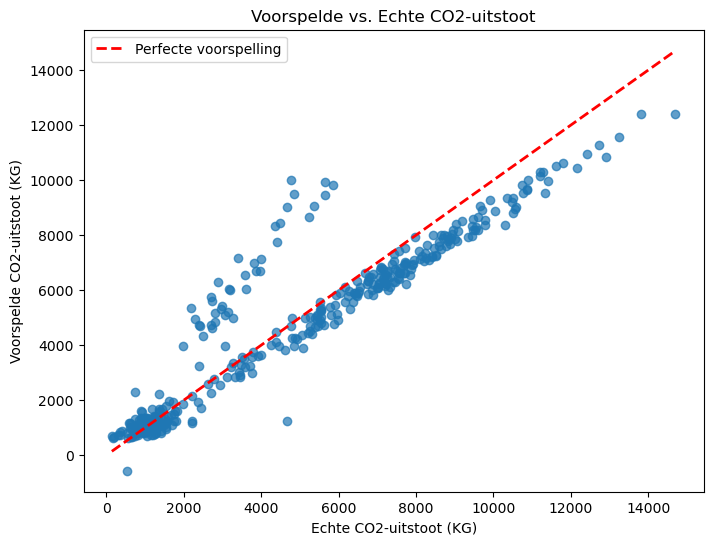

In [44]:
# 21. Train een model om de jaarlijkse CO2 uitstoot te voorspellen.

# Gebruik de split en df_mod uit de eerdere cellen
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Gebruik de bestaande train/test split en df_mod
features = [
    'km_auto_per_jaar',
    'km_fiets_per_jaar',
    'km_ov_per_jaar',
    'km_vliegtuig_per_jaar',
    'dagen_in_buitenland_per_jaar'
]

# Gebruik de bestaande X_train, X_test, y_train, y_test uit de split op df_mod
# (deze zijn al aangemaakt in een eerdere cel)

# Train een lineair regressiemodel
linreg = LinearRegression()
linreg.fit(X_train[features], y_train)

# Voorspel de CO2-uitstoot op de test set
y_pred = linreg.predict(X_test[features])

# Plot de echte versus voorspelde waarden
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Echte CO2-uitstoot (KG)")
plt.ylabel("Voorspelde CO2-uitstoot (KG)")
plt.title("Voorspelde vs. Echte CO2-uitstoot")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfecte voorspelling")
plt.legend()
plt.show()

22.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Welke metric zou je gebruiken om te toetsen hoe goed je model is en waarom?


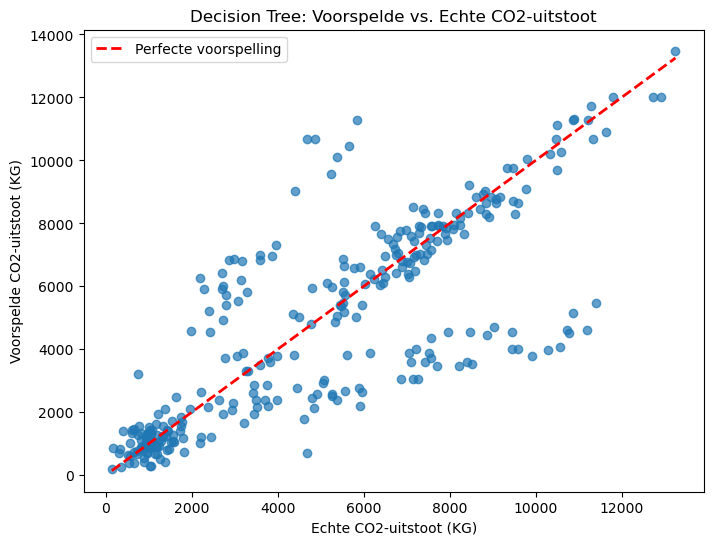

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Stel de features en target in
features_mod = [
    'km_auto_per_jaar',
    'km_fiets_per_jaar',
    'km_ov_per_jaar',
    'km_vliegtuig_per_jaar',
    'dagen_in_buitenland_per_jaar'
]
X_mod = df[features_mod]
y_mod = df['co2_uitstoot_per_jaar_KG']

# Split de data in train en test sets (zonder schalen)
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_mod, y_mod, test_size=0.2, random_state=42)

# Train een Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_mod, y_train_mod)

# Voorspel de CO2-uitstoot op de test set
y_pred_tree = tree_model.predict(X_test_mod)

# Plot de echte versus voorspelde waarden
plt.figure(figsize=(8, 6))
plt.scatter(y_test_mod, y_pred_tree, alpha=0.7)
plt.xlabel("Echte CO2-uitstoot (KG)")
plt.ylabel("Voorspelde CO2-uitstoot (KG)")
plt.title("Decision Tree: Voorspelde vs. Echte CO2-uitstoot")
plt.plot([y_test_mod.min(), y_test_mod.max()], [y_test_mod.min(), y_test_mod.max()], 'r--', lw=2, label="Perfecte voorspelling")
plt.legend()
plt.show()


Voor zowel de decision tree regressor als lineaire regressie zou ik het model evalueren met de Mean Squared Error (MSE), die de gemiddelde afwijking tussen voorspelde en werkelijke waarden berekent en grotere fouten zwaarder bestraft. Daarnaast zou ik de Root Mean Squared Error (RMSE) gebruiken, die hetzelfde meet als MSE maar interpreteerbaar is in dezelfde eenheid als de afhankelijke variabele. Ook de Mean Absolute Error (MAE) is nuttig, omdat deze robuuster is en minder gevoelig voor uitschieters. Tot slot zou ik R-squared (R²) toepassen, waarmee wordt aangegeven welk deel van de variantie in de afhankelijke variabele verklaard wordt door het model. Deze vier metrics geven samen een goed beeld van de prestaties van het model.

23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot). Hier wordt gevraagd naar de wiskunde functie van het model en om deze vervolgens toe te passen. Het gaat hier om de wiskunde formule van het door jullie getrainde model en niet de algemene wiskunde functie. Aanvulling: de toepassing op een groepslid mag (gedeeltelijk) fictief zijn.

24.	Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.

In [45]:
# 24
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel
import numpy as np

# Voer 20-fold cross-validation uit voor beide modellen
# (We nemen aan dat je eerder een lineair regressiemodel hebt getraind als 'linreg' en een decision tree als 'tree_model')

# Cross-validation scores (negatieve MSE, dus we nemen de -1 * waarde voor interpretatie)
scores_linreg = cross_val_score(linreg, X_mod, y_mod, cv=20, scoring='neg_mean_squared_error')
scores_tree = cross_val_score(tree_model, X_mod, y_mod, cv=20, scoring='neg_mean_squared_error')

# Zet om naar positieve MSE
mse_linreg = -scores_linreg
mse_tree = -scores_tree

print("Gemiddelde MSE Lineaire Regressie:", np.mean(mse_linreg))
print("Gemiddelde MSE Decision Tree:", np.mean(mse_tree))

# Toets of het verschil significant is met een gepaarde t-toets
t_stat, p_value = ttest_rel(mse_linreg, mse_tree)
print(f"T-toets: t = {t_stat:.3f}, p = {p_value:.4f}")

if p_value < 0.05:
    print("Het verschil in prestaties tussen de modellen is statistisch significant (p < 0.05).")
else:
    print("Het verschil in prestaties tussen de modellen is NIET statistisch significant (p >= 0.05).")

Gemiddelde MSE Lineaire Regressie: 1935429.2003664323
Gemiddelde MSE Decision Tree: 3881897.838113134
T-toets: t = -8.066, p = 0.0000
Het verschil in prestaties tussen de modellen is statistisch significant (p < 0.05).


25.	Splits de target variabele op in 2 klassen, kies hiervoor een geschikte punt. Codeer de eerste groep als 0 en de tweede groep als 1. Welk model zou je nu kunnen gebruiken en waarom?


In [46]:
# 25
# Splits de targetvariabele (co2_uitstoot_per_jaar_KG) op in 2 klassen.
# We kiezen de mediaan als scheidingspunt: <= mediaan = 0 (lage uitstoot), > mediaan = 1 (hoge uitstoot).

# Stel: y_mod is je targetvariabele (co2_uitstoot_per_jaar_KG)
import numpy as np

# Bepaal de mediaan van de target
median_co2 = np.median(y_mod)

# Maak een binaire target
y_bin = (y_mod > median_co2).astype(int)

print(f"Mediaan CO2-uitstoot: {median_co2:.2f}")
print("Aantal in klasse 0 (lage uitstoot):", np.sum(y_bin == 0))
print("Aantal in klasse 1 (hoge uitstoot):", np.sum(y_bin == 1))

# Nu kun je een classificatiemodel gebruiken, zoals Logistic Regression of Decision Tree Classifier,
# omdat de target nu binair is (0/1).

Mediaan CO2-uitstoot: 4677.28
Aantal in klasse 0 (lage uitstoot): 754
Aantal in klasse 1 (hoge uitstoot): 746


26.	Train een nieuw model op de nieuwe target, gebruik hierbij alleen de vijf meest invloedrijke onafhankelijke variabelen die je eerder hebt gekozen. Geef de wiskunde functie van dit model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).


In [47]:
# 26
# We nemen aan dat de vijf meest invloedrijke variabelen al eerder bepaald zijn.
# Stel, deze zijn: 'km_auto_per_jaar', 'km_vliegtuig_per_jaar', 'km_ov_per_jaar', 'huishouden_grootte', 'elektrisch_auto'
# (Pas deze lijst aan als je andere variabelen hebt gekozen!)

from sklearn.linear_model import LogisticRegression

# Selecteer de features
invloedrijke_features = ['km_auto_per_jaar', 'km_vliegtuig_per_jaar', 'km_ov_per_jaar', 'huishouden_grootte', 'elektrisch_auto']
X_invloedrijk = X_mod[invloedrijke_features]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_invloedrijk, y_bin, test_size=0.2, random_state=42)

# Train het model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Coëfficiënten en intercept
print("Intercept (b0):", logreg.intercept_[0])
for i, feature in enumerate(invloedrijke_features):
    print(f"Coef {feature} (b{i+1}): {logreg.coef_[0][i]}")

# Wiskundige functie:
print("\nWiskundige functie van het model:")
functie = f"logit(p) = {logreg.intercept_[0]:.4f}"
for i, feature in enumerate(invloedrijke_features):
    functie += f" + ({logreg.coef_[0][i]:.4f})*{feature}"
print(functie)
print("Waarbij logit(p) = ln(p/(1-p)), en p de kans op hoge uitstoot (klasse 1) is.")

# Pas toe op een groepsgenoot (voorbeeld: eerste rij van de dataset)
# Vervang deze index door de index van jouw groepsgenoot!
groepsgenoot_index = 0
persoon_data = X_invloedrijk.iloc[groepsgenoot_index].values.reshape(1, -1)
kans_hoge_uitstoot = logreg.predict_proba(persoon_data)[0,1]
print(f"\nKans op hoge CO2-uitstoot voor groepsgenoot (index {groepsgenoot_index}): {kans_hoge_uitstoot:.2%}")


KeyError: "['huishouden_grootte', 'elektrisch_auto'] not in index"

27.	Schrijf een conclusie op basis van de twee hoofdvragen van het portfolio (zie kopje ‘Vraagstellingen’)


In [120]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
# Other:
from scipy.stats import shapiro
from scipy.stats import iqr
from scipy.stats import ttest_rel

# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
pd.set_option('display.max_columns', 10)

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

In [122]:
# 2

Missende waarden percentage
co2_uitstoot_per_jaar_KG    0.47
jaarsalaris_eu              0.07
stad                        0.07
opleiding_niveau            0.07
autobezit                   0.07
dtype: float64
Extreme waarden gedetecteerd in: co2_uitstoot_per_jaar_KG


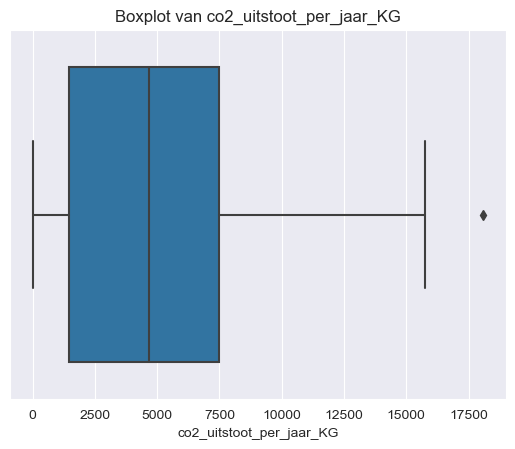

Extreme waarden gedetecteerd in: gewicht_KG


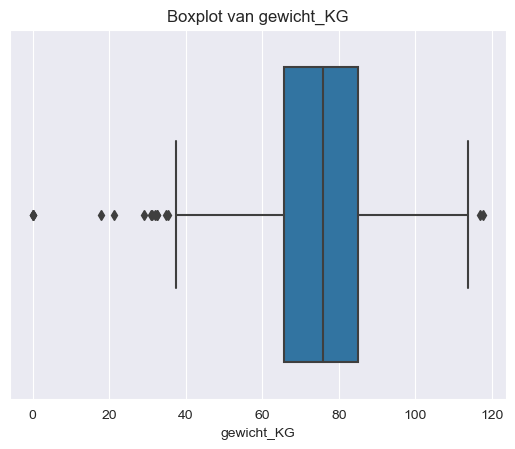

Extreme waarden gedetecteerd in: jaarsalaris_eu


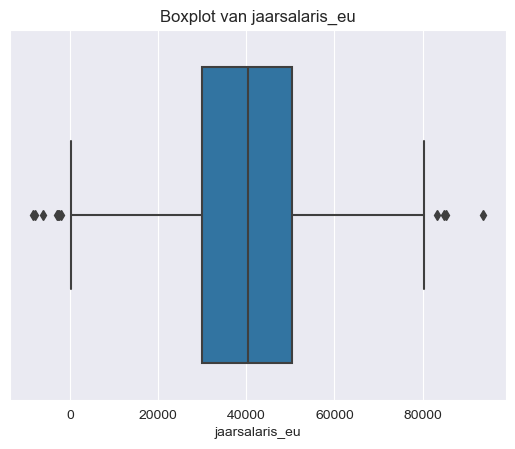

Extreme waarden gedetecteerd in: km_auto_per_jaar


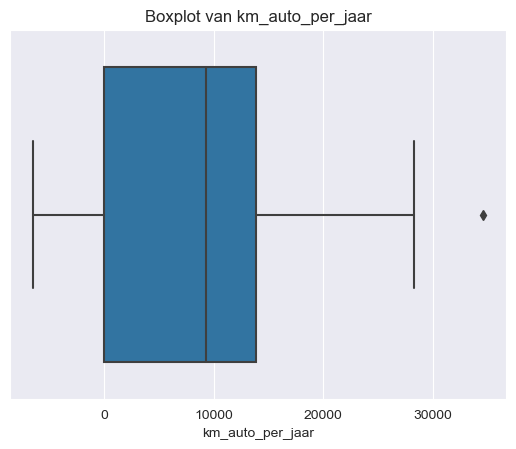

Extreme waarden gedetecteerd in: km_ov_per_jaar


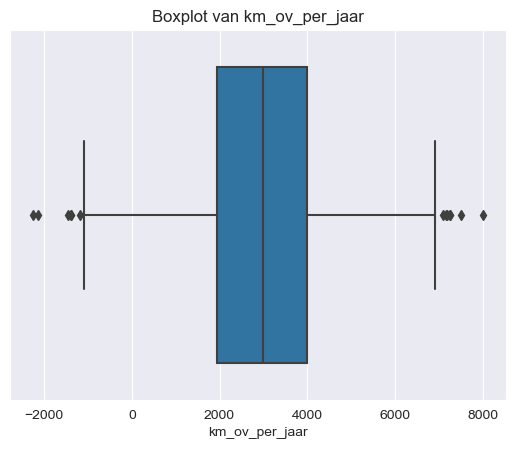

Extreme waarden gedetecteerd in: km_vliegtuig_per_jaar


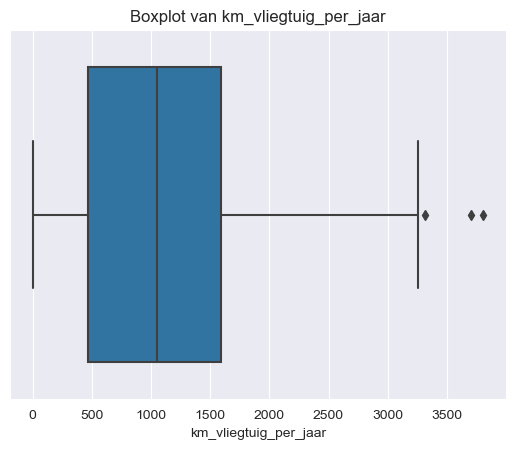

In [123]:
# 3
# import z-score
from scipy.stats import zscore
# Eerst missende waarden:
mv = df_co2.isnull().mean() * 100
print("Missende waarden percentage")
print(mv[mv > 0].sort_values(ascending=False).round(2))

# Extreme waarden
# Instellingen
threshold = 3
columns_to_check = df_co2.select_dtypes(include=[np.number]).columns.difference(['persoon_ID'])

# Loop voor relevante kollomen
for col in columns_to_check:
    z_scores = zscore(df_co2[col].dropna())
    extreme_mask = np.abs(z_scores) > threshold

    if extreme_mask.any():
        print(f"Extreme waarden gedetecteerd in: {col}")
        sns.boxplot(x=df_co2[col])
        plt.title(f"Boxplot van {col}")
        plt.show()

4.	Kies 2 onafhankelijke variabelen waarvan je denkt dat het invloed kan hebben op de jaarlijkse CO2 uitstoot. Visualiseer de verdeling van deze twee variabelen en de verdeling van de afhankelijke variabele.

Twee kolommen die ik heb gekozen met potential correlatie/invloed op "co2_uitstoot_per_jaar_KG" zijn: "km_auto_per_jaar" en "km_vliegtuig_per_jaar". Ik heb voor deze twee kolommen gekozen, omdat deze twee vervoermiddelen worden vaak gebruikt en gebruiken ook veel brandstof.

Op de heatmap kan je zien dat ik had wel gelijk en deze twee variabelen hadden het grootste invloed. In het geval van de auto's er is een heel grote (bijna perfecte) positive correlatie, maar wat verrassing is, is dat hoewel vliegtuigen het tweede hoogste correlatie hierbij hebben die is nog steeds heel klein. Dit is een zwake positive correlatie dat betekent dat gebruiken van vliegtuigen heeft kleine invloed op co2 uitstoot per jaar in kilograms per kilometer. Het is belangrijk om te merken dat vliegtuigen worden gebruikt om grotere afstanden te reisen in kleine tijden en dus terwijl co2 productie per km kan veel minder zijn voor vliegtuigen,

Ik heb voor hist plot gekozen, omdat die laat zien verdelingen goed.
Er zijn geen afhankelijk variabelen met echte invloed (behalve co2 zelf) waarmee de correlatie zou groot zijn (alles minder dan 0.1 corr).

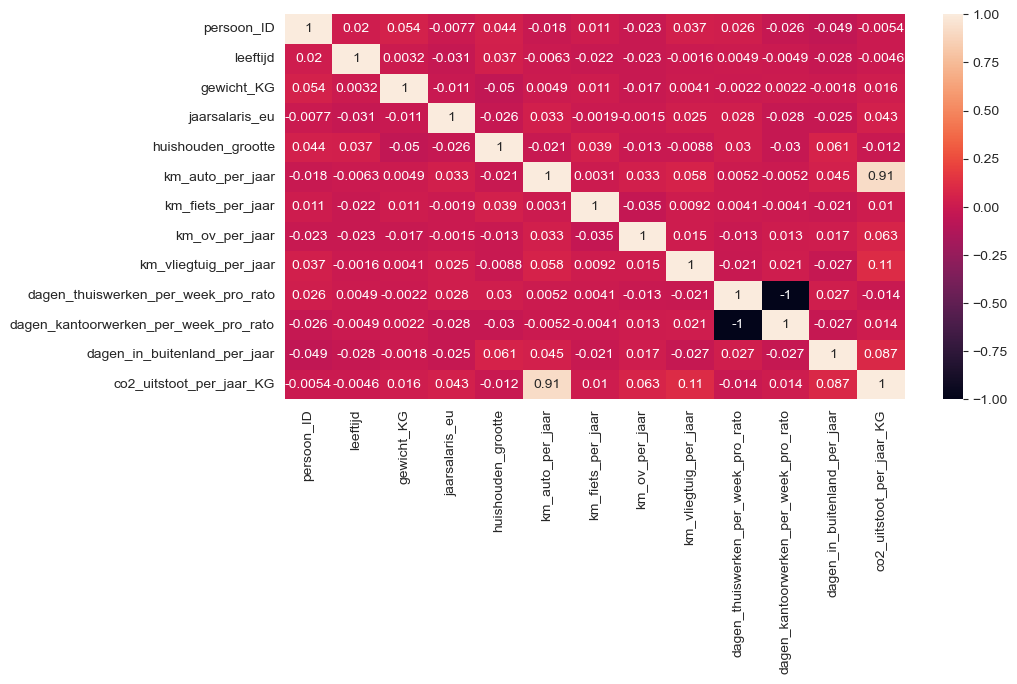

C:\Users\mkako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


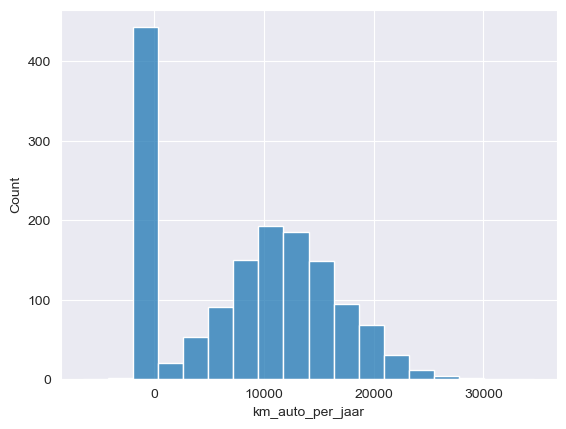

C:\Users\mkako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


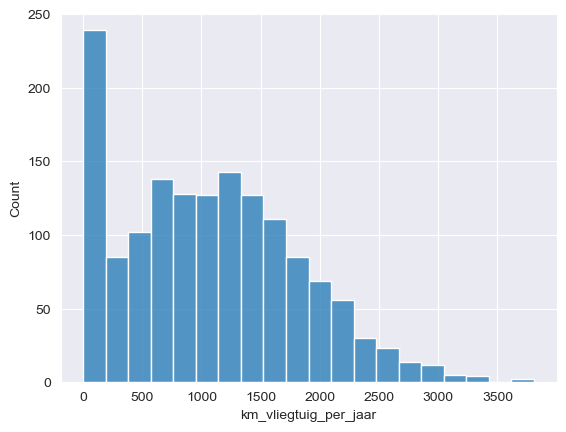

C:\Users\mkako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


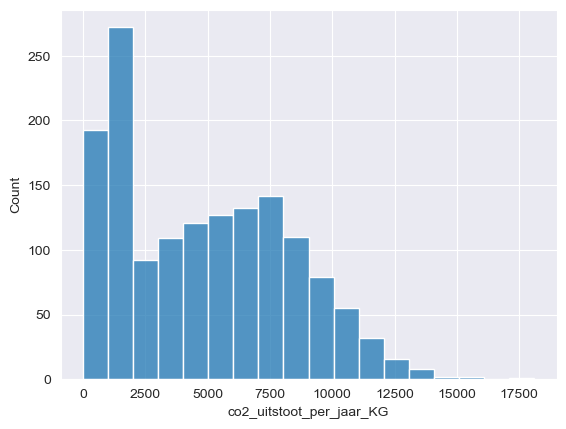

In [124]:
# 4
# heatmap
numeric_cols = df_co2.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_co2[numeric_cols]
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

# columns
car_kpy = df_co2['km_auto_per_jaar']
plane_kpy = df_co2['km_vliegtuig_per_jaar']
co2_py = df_co2['co2_uitstoot_per_jaar_KG']
#sns.regplot(x=car_kpy, y=co2_py)
#plt.show()
#sns.regplot(x=plane_kpy, y=co2_py)
#plt.show()

# hist plot
def hist_plot_maker(data, x):
    sns.histplot(data=data, x=x)
    plt.show()
hist_plot_maker(df_co2, car_kpy)
hist_plot_maker(df_co2, plane_kpy)
hist_plot_maker(df_co2, co2_py)

5.	Geef een beschrijving van de 3 visualisaties met behulp van statistische termen.

Bij alle visualizes er is grote hoeveelheid van data met ≈0 waarden, dit heeft een invloed bij de spread en verdeling van de data en betekent ook dat data is niet altijd qua statistieken "netjes" verdeeld. Het is ook de rede waarom ik heb gekozen om IQR in plaats van bereik te gebruiken.

#1 (km_auto_per_jaar): Zonder extreme waarden mean, mode en mediaan zijn in ongeveer hetzelfde plek. Er is geen Skewness.

#2 (km_vliegtuig_per_jaar): Er is grootste getallen op de linkerkant van de plot met kleinste getallen op de rechterkant. Dit geeft aan rechte/positive Skewness van 0.414 (kleine "tail" op rechte kant), met negatieve Kurtosis van -0.34, dus de "peak" is best wel "flat" in vergelijking met normaal verdeeld data.

#3 (co2_uitstoot_per_jaar_KG): Vergelijkbare rechte Skewness met plot #2 (0.440) maar dan met grootse negative Kurtosis, dus te "peak" is nog meer "flatter".



Ik heb een functie gemaakt die gebruikt shapiro om te berekenen of de verdelingen normaal verdeeld zijn. Dit is niet 100% accuraat maar met berekeningen uit vorige opdracht met statistieken krijg ik een goede beeld van de verdeling. Ik heb hierbij threshold van 0.05 p gezet, omdat dit de norm is in bepalen of de verschil klein genoeg is. Als die p groter is dan de threshold, dan de data is normaal verdeeld.

In ider geval de data moet in de vorm van dataframe of numpy array zijn zonder null waarden en numerieke waarden.

Nominaal: Categorische data zonder volgorde moet worden omgezet naar dummyvariabelen, zodat het model de categorieën kan gebruiken zonder te denken dat er een volgorde is.

Ordinaal: Data moet naar numerieke waarden geconverteerd worden (mapping), zodat ze in een model kunnen worden ingevuld en voorspeld worden.

Interval: Standarizatie (Z-scoren) uitvoeren om data op schaal te krijgen, zodat de data gelijk verdeeld is op de schaal bij verschillende variabelen.
Ratio: Hetzelfde als bij Interval.


8.	Voer de transformatie uit. Let op dat je de getransformeerde variabelen in een nieuw dataframe opslaat, zodat je de oorspronkelijke waarden behoudt. De getransformeerde variabelen gebruik je alleen bij deel D. Zorg dat je inzicht krijgt in de relatie tussen de variabelen. Wat zijn je bevindingen?

In [127]:
# 8
# Dumming Nominaals:
transformed_df_co2 = df_co2.copy()
transformed_df_co2 = pd.get_dummies(transformed_df_co2, columns=['geslacht', 'burgerlijke_staat', 'stad', 'provincie', 'autobezit', 'fietsbezit', 'elektrisch_auto'], drop_first=True)

# Mapping Ordinaals:
print(transformed_df_co2['opleiding_niveau'].unique())
print(transformed_df_co2['gebruik_carsharing'].unique())
transformed_df_co2['opleiding_niveau'] = transformed_df_co2['opleiding_niveau'].map(
    {'MBO': 1, 'HBO': 2, 'WO': 3})
transformed_df_co2['gebruik_carsharing'] = transformed_df_co2['gebruik_carsharing'].map(
    {'Nooit': 1, 'Heel soms': 2, 'Soms': 3, 'Vaak': 4, 'Altijd': 5})

# Standardizing Ratios:
ratio_cols = ['leeftijd', 'gewicht_KG', 'jaarsalaris_eu', 'huishouden_grootte','km_auto_per_jaar', 'km_fiets_per_jaar', 'km_ov_per_jaar', 'km_vliegtuig_per_jaar', 'dagen_thuiswerken_per_week_pro_rato', 'dagen_kantoorwerken_per_week_pro_rato', 'dagen_in_buitenland_per_jaar','co2_uitstoot_per_jaar_KG']

scaler = StandardScaler()
scaled_df_co2 = transformed_df_co2.copy()
scaled_df_co2[ratio_cols] = scaler.fit_transform(scaled_df_co2[ratio_cols])

['MBO' 'WO' 'HBO' nan]
['Nooit' 'Heel soms' 'Altijd' 'Vaak' 'Soms']


Methoden die heb ik hierbij gebruikt zijn .unique(), omdat ik had alle unique waarden van deze kolommen nodig om te beslissen wat moet ik met behulp van .map() mappen voor ordinaal kolommen. Ernaast heb ik StandardScaler() en fit_transform() hier gebruikt om de data te standarizieren (mean in het middle met elke std van 1) voor ratios. get_dummies() is hierbij gebruikt om categorisch data naar numeriek data te veranderen (elke unique waarde krijgt een kolom). Ik heb ook .copy() hier gebruikt om geen vertandingen aan main df te maken, er naas er is ook copy voor scalen gemaakt, omdat er waren twee df nodig.

10.	Is er sprake van multicollineariteit? Waarom zou dit een probleem kunnen zijn en wat zou jouw oplossing zijn?

In [128]:
# 10
any_corrs = scaled_df_co2.corr()
strong_corrs = []
columns = any_corrs.columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)): # om te voorkomen duplicate
        col1 = columns[i] # eerste kolom
        col2 = columns[j] # tweede kolom
        corr_value = any_corrs.loc[col1, col2] # correlatie waarde
        if abs(corr_value) > 0.5 and abs(corr_value) != 1: # filter en verwijder -
            strong_corrs.append((col1, col2, corr_value))
for col1, col2, corr in strong_corrs:
    print(f"{col1} VS {col2}: {corr:.2f}")

km_auto_per_jaar VS co2_uitstoot_per_jaar_KG: 0.91
km_auto_per_jaar VS autobezit_nee: -0.78
km_fiets_per_jaar VS fietsbezit_nee: -0.78
co2_uitstoot_per_jaar_KG VS autobezit_nee: -0.71
geslacht_man VS geslacht_vrouw: -1.00


Mannen vs Vrouwen hebben hier perfecte negatieve correlatie coefficient, dat betekent dat als een positieve is dan de andere negatieve wordt (omdat dit is een binary kolom). Er naast km_auto_per jaar heeft sterke negatieve correlatie met autobezit_nee, hetzelfde hoort ook bij km_fiets_per_jaar vs fietsbezit_nee. Deze twee zijn logisch en ook verwacht. Bij predicitev model bouwen een van deze kolommen zou moeten verwijderd zijn om multicollineariteit te voorkomen. Dit zou een probleem zijn, omdat het geeft eigelijk een "weight" aan een kolom terwijl dat helemaal niet nodig is.

Ik heb gekozen om deze for loop te gebruiken om correlaties te vinden van X variabelen. Heatmap was mij eerste idee maar na data transformatie er waren gewoon te veel kolommen.

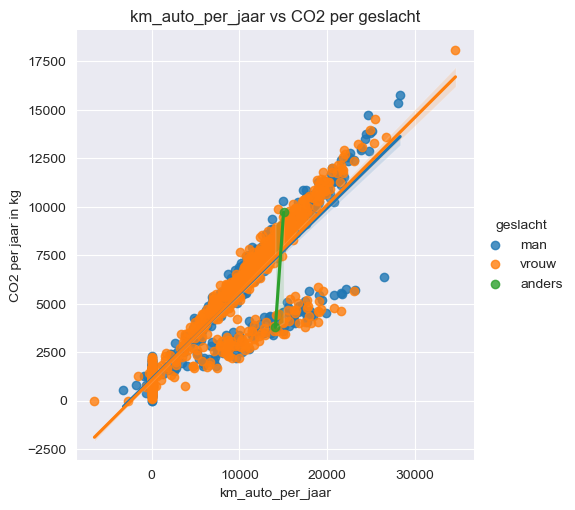

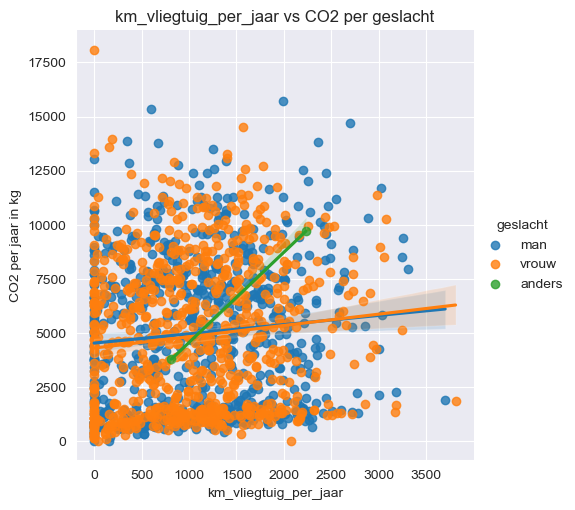

In [129]:
# 11
x_kolommen = ['km_auto_per_jaar', 'km_vliegtuig_per_jaar']
for col in x_kolommen:
    sns.lmplot(data=df_co2, x=col, y='co2_uitstoot_per_jaar_KG', hue='geslacht')
    plt.title(f'{col} vs CO2 per geslacht')
    plt.xlabel(col)
    plt.ylabel('CO2 per jaar in kg')
    plt.show()

In [130]:
# 12

In [131]:
# 13

In [132]:
# 14

In [133]:
# 15

In [134]:
# 16

In [135]:
# 17

In [136]:
# 18

In [137]:
# 19

In [138]:
# 20

Deze split kan op veel verschillende manieren gemaakt worden door test_size en random_state hyperparameters te tweaken. Maar verder een van de workflows is om y kolom te droppen voor X, en voor y allen y kolom te gebruiken. Sklearn module (train_test_split) wordt hier gebruikt om splitting automatisch te doen.

In [139]:
# 21
scaled_df_co2.dropna(inplace=True)
# omdat er zo weinig nulwaarden waren ik heb gekozen om rows met missende waarden te verwijderen
print(scaled_df_co2.isnull().sum()) # geen null waarden
print(scaled_df_co2.dtypes) # numerieke kolommen
print(type(scaled_df_co2)) # dataframe vorm
# Data voldoet nu al aan machine learning criteria
X = scaled_df_co2[['km_auto_per_jaar', 'km_vliegtuig_per_jaar']].values
y = scaled_df_co2['co2_uitstoot_per_jaar_KG'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


persoon_ID                               0
leeftijd                                 0
gewicht_KG                               0
jaarsalaris_eu                           0
huishouden_grootte                       0
opleiding_niveau                         0
km_auto_per_jaar                         0
km_fiets_per_jaar                        0
km_ov_per_jaar                           0
km_vliegtuig_per_jaar                    0
dagen_thuiswerken_per_week_pro_rato      0
dagen_kantoorwerken_per_week_pro_rato    0
dagen_in_buitenland_per_jaar             0
gebruik_carsharing                       0
co2_uitstoot_per_jaar_KG                 0
geslacht_man                             0
geslacht_vrouw                           0
burgerlijke_staat_gescheiden             0
burgerlijke_staat_ongehuwd               0
burgerlijke_staat_samenwonend            0
burgerlijke_staat_weduwe/weduwnaar       0
stad_Amersfoort                          0
stad_Amsterdam                           0
stad_Apeldo

Om te kijken hoe goed ons model werkt, zou ik RMSE hier gebruiken, omdat die terug gaat naar originele units en dus geeft aan de beste beeld van de performance van ons model. Er naas R^2 ik hierbij ook handing om te controleren om data op schaal te zetten en evalueren. Ik heb KFold gebruikt om meer accurate evaluatie te hebben. Data die gaan wij voorspellen is een regressie (geen binary data) dus metric systeem zo als confusion matrix of andere methoden die gebruiken True-Positives, True-Negatives, etc., zou hier niet goed kunnen werken.

In [140]:
# 22
X = scaled_df_co2[['km_auto_per_jaar', 'km_vliegtuig_per_jaar']].values
y = scaled_df_co2['co2_uitstoot_per_jaar_KG'].values
kf = KFold(n_splits=5, shuffle=True, random_state=42) # maak 5 folds
reg = LinearRegression() # maak model
rmse_scores = []
r2_scores = []
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X[train_idx], X[test_idx] # features
    y_train, y_test = y[train_idx], y[test_idx]
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))
print(f"Mean RMSE: {np.mean(rmse_scores).round(3)}")
print(f"Mean R2: {np.mean(r2_scores).round(3)}")

Mean RMSE: 0.402
Mean R2: 0.837


23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).

$$y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2$$

y: co2_uitstoot_per_jaar_KG.

$x_1$: km_auto_per_jaar.

$x_2$: km_vliegtuig_per_jaar.

$\beta_0$: Intercept (bias term).

$\beta_1$: Coefficient voor km_auto_per_jaar.

$\beta_2$: Coefficient voor km_vliegtuig_per_jaar.

In [141]:
# 23
# GenAi: https://grok.com/share/c2hhcmQtMg%3D%3D_a47f4b25-838d-4d26-ab7d-42c72ace49fd
# Voorbeeld data
group_member_data = np.array([[12000, 5000]])  # [[km_auto_per_jaar, km_vliegtuig_per_jaar]]
scaler = StandardScaler()
scaler.fit(scaled_df_co2[['km_auto_per_jaar', 'km_vliegtuig_per_jaar']])
scaled_group_member_data = scaler.transform(group_member_data)
# voorspelling:
predicted_co2 = reg.predict(scaled_group_member_data)

print(f"Voorspelling CO2: {predicted_co2[0]:.2f} kg per jaar")

Voorspelling CO2: 11179.95 kg per jaar


C:\Users\mkako\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


24. Kies de vijf onafhankelijke variabelen die de meeste invloed hebben op de voorspelling. Train en test nu twee modellen (1: met alle variabelen en 2: met de vijf meest invloedrijke variabelen). Kies 1 metric om de nauwkeurigheden van de modellen te kwantificeren. Gebruik hiervoor 20-fold crossvalidation. Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.
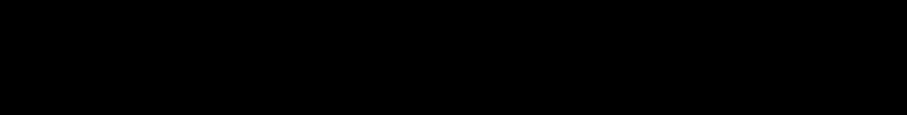

In [149]:
# 24
# Functie die maakt 20 folds en bereikent RMSE voor elke split
def rmse_20_reg(X, y):
    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    reg = LinearRegression()
    rmse_scores = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    return rmse_scores

# Top 5 features (X)
co2_corr = scaled_df_co2.corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False)
top5_features = co2_corr.drop('co2_uitstoot_per_jaar_KG').head(5).index.tolist()
print(top5_features)

# Split data in X met alle kolommen behalve y, en andere X met alleen maar top 5 kolommen, en naar y kolom
X_all = scaled_df_co2.drop('co2_uitstoot_per_jaar_KG', axis=1).values
X_top5 = scaled_df_co2[top5_features].values
y = scaled_df_co2['co2_uitstoot_per_jaar_KG'].values

# Gebruik custom functie om data in folds te trainen en testen en berekenen de RMSE van elke fold
rmse_all = rmse_20_reg(X_all, y)
rmse_top5 = rmse_20_reg(X_top5, y)
print(f"Alle kolommen RMSE: {np.mean(rmse_all).round(3)}")
print(f"Top 5 kolommen RMSE: {np.mean(rmse_top5).round(3)}")

# t-test en p-value
t_stat, p_value = ttest_rel(rmse_all, rmse_top5)
print(f"T-test p-value: {p_value.round(3)}")
if p_value < 0.05:
    print("H0 rejected (er is een significant verschil trussen modellen)")
else:
    print("Er is geen statistische verschil")

['km_auto_per_jaar', 'elektrisch_auto_nee', 'km_vliegtuig_per_jaar', 'dagen_in_buitenland_per_jaar', 'km_ov_per_jaar']
Alle kolommen RMSE: 0.267
Top 5 kolommen RMSE: 0.261
T-test p-value: 0.001
H0 rejected (er is een significant verschil trussen modellen)


Ik heb voor RMSE gekozen, omdat die laat het verschil (errors) zien in echte units. Er naast door mij berekening blijkt dat p_value bij t-test kleiner dat 0.05 is, dat betekent dat H0 hypothesis hier rejected wordt. Op basis van dat ik trek een conlusie dat het verschil tussen modellen is statistisch aanwezig.

Ik heb gekozen om data splitsen in het middle van totaal hoeveelheid, daarom heb ik median hier gebruikt om die als criteria van middel te bepalen. Deze split verdeeld y in binare data en dus een logistieke regressie is hierbij mogelijk en aangeraden. Ernaast deze model kan dat geëvalueerd worden met True positive, True negatieve, False positieve en False negatieve op confusion matrix en metric scoren zoals precision, recall en f1.

In [143]:
# 25
median_co2 = scaled_df_co2['co2_uitstoot_per_jaar_KG'].median()
co2_0 = scaled_df_co2[scaled_df_co2['co2_uitstoot_per_jaar_KG'] <= median_co2]
co2_1 = scaled_df_co2[scaled_df_co2['co2_uitstoot_per_jaar_KG'] > median_co2]
print(co2_0['co2_uitstoot_per_jaar_KG'].describe()) # Ik gebruik hier .describe() om te kijken of waarden kloppen bij mediaan verdeling
print("---" * 100)
print(co2_1['co2_uitstoot_per_jaar_KG'].describe())

count    746.000000
mean      -0.856957
std        0.373126
min       -1.435620
25%       -1.146573
50%       -1.006064
75%       -0.545066
max       -0.068696
Name: co2_uitstoot_per_jaar_KG, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
count    745.000000
mean       0.857954
std        0.625079
min       -0.068588
25%        0.382668
50%        0.750845
75%        1.225084
max        3.853606
Name: co2_uitstoot_per_jaar_KG, dtype: float64


In [166]:
# 26
# Bron: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# Maak binary kolom aan op basis van mediaan criteria en split data in X en y om ze te trainen
X = scaled_df_co2[top5_features]
y = (scaled_df_co2['co2_uitstoot_per_jaar_KG'] > median_co2).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Logistic regressie om binary data te voorspellen:
model = LogisticRegression(max_iter=1000) # max_iter om balans te houden tussen goede voorspellingen en efficient m
model.fit(X_train, y_train)

# Evaluate model accuracy
accuracy = model.score(X_test, y_test)
print(f"Logistic accuracy: {accuracy}") # om te kijken hoe vaak logistic regressie maakt een error, dit is een goede metric systeem hier, omdat data die wordt voorspelt is binary.
print("---" * 100)

# wiskunde functie van model
# GenAI: https://grok.com/share/c2hhcmQtMg%3D%3D_7455cf79-92fe-4373-9ef8-8ee6b232beb4
# Get coefficients en intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Wiskundige functie (z):")
print(f"z = {intercept:.3f} + ", end="")
for coef, feature in zip(coefficients, top5_features):
    print(f"{coef:.3f} * {feature} + ", end="")
print("\b\b")

# Groepsgenoot voorbeeld
group_member_data = np.array([[15000, 6.5, 1400, 100, 5]])  # [[km_auto_per_jaar, elektrisch_auto_nee, km_vliegtuig_per_jaar, dagen_in_buitenland_per_jaar, km_ov_per_jaar]]
scaler = StandardScaler()
scaler.fit(scaled_df_co2[top5_features])
scaled_group_member_data = scaler.transform(group_member_data)
# voorspelling:
predicted_co2 = model.predict_proba(scaled_group_member_data)
print(predicted_co2)

Logistic accuracy: 0.9866220735785953
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Wiskundige functie (z):
z = -6.194 + 4.983 * km_auto_per_jaar + 7.490 * elektrisch_auto_nee + 0.509 * km_vliegtuig_per_jaar + 0.318 * dagen_in_buitenland_per_jaar + 0.232 * km_ov_per_jaar 
[[0. 1.]]


C:\Users\mkako\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mkako\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Uit het resultaat blijk het dat accuracy voor onze logistic model is heel hoog. Dit is een kenmerk van goed gekozene features voor het trainen van model om y te voorspellen.

- Welke persoonlijke en mobiliteitsgerelateerde factoren verklaren verschillen in de jaarlijkse CO₂-uitstoot tussen burgers?
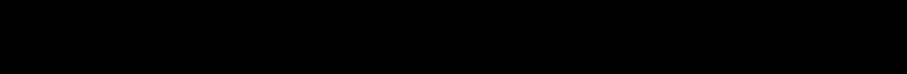
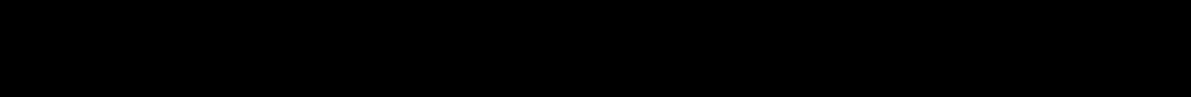
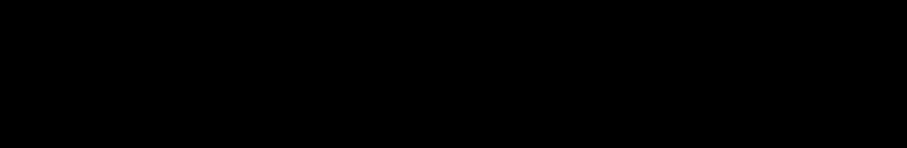

- In welke mate kunnen we individuele uitstoot nauwkeurig voorspellen op basis van een combinatie van sociaaldemografische kenmerken en mobiliteitsgedrag?